# Exploring Ceramic Glazes Using Unsupervised Clustering

Ceramics as a feild encompaces a broad range of physical materials that can be as specialized as superconducting magnets or as ubiquitous as comon floor tile. Ceramic materials are often highly dimensional in regards to the chemistry and formation conditions. This has led many Ceramic Material Science programs to adopt recent Machine learning techniques to help select materials for testing and implementation. In this notebook Ceramic glazes will be investigated with clustering techniques. 

Ceramic Glazes are glass like coatings that are applied to ceramic wares in the form of a water suspended mixture of powdered materials. The coatings are then brought to a molten state in a kiln, where they fuse to the ceramic ware. Most Ceramic glazes are composed primaraly of silica and alumina, they also contain a large variaty of metal oxides.  As with any ceramic material they vary with a highlevel of dimensionality in regards to chemical composition, ratios of metal oxides, particulate shape, particulate size, hydration, and firing process(heating process).
     
Ceramic glazes are frequently employed by potters, artists, designers, and architects and are often formulated and altered by individuals in these feilds with little or no knowledge of ceramic chemistry. This is both a boon and an burden to the industry in that there is a high level variation and experimentation with glaze surfaces, yet often these formulations are mislabeld, mischaricterized, and in some cases can result in dangerous conditions for food surfaces or architectural orniment. 
     
     
     
     
     one of the most common mis charicterizations regarding glaze is its mattness, this mischaricterization is  related to Firing temperature, the chemistry of the glaze, and the surface sheen of the glaze. A true matte glaze is a glaze that forms its matte surface by forming small crystals during the cooling process, this is typically achieved though low silica to alumina ratios (6>silica to alumina< 1). Underfired glazes are glazes where the materials have been sintered but have not yet achieved a complete melt. Underfired glazes can be problematic for designers potters and industirial applications because they are typically weaker, and can have both devitrified and porus surfaces that can leach ingredients, and harbor food, dirt, & bacteria. 

    In this note book issues around mislabeling of matte glazes are adressed with unsupervized clustering techniques. A dataset that orignated from the website glazy.org is analyzed and examined using dimensionality reduction. Glazy.org is a community based website that anyone can upload glaze recipes to where they are publicly availible. Glazy then takes the ingredients used in the recipe and forms its chemical composition.   The data set consists of 330 variables such as names, physical descriptions of surface and opacity, firing temperatures, and a detailed list of ceramic oxides present by Percentage,UMF, and Moles. 
   When examining the dataset several issues arise, the first issue with the dataset is sparcity, which has lead to a large number of unfilled variables. Particularly metal oxieds that pertain to one glaze and not to another. Glazes often substitute various metal oxides for one another. the second issue with the dataset is labeling we can treat the chemical make up of each glaze as a ground truth, because the chemical composition of raw materials dosnt vary all that much and can easily be calculated by software.  However, the physical descriptions and firing temperatures are labled by the individuals uploading the recipies, this has likely resulted in some unacounted variation related to opinions on firing, mattness, opacity, and  

- - describe what a glaze is 
- - describe what the data set is and problems that migth be encounterd
- - describe the problem you are trying to solve mis labeled glaze sheen 
- -  describe science behind glazes UMF
- - describe problems you expect to encounter related to the dataset 
data set 

References
https://ceramicartsnetwork.org/daily/ceramic-glaze-recipes/glaze-chemistry/makes-matte-glaze-matte/

In [188]:
from IPython.display import Image
Image(url= "https://s3-us-west-2.amazonaws.com/reference/images/glossary/nenbuninux.jpg")

In [303]:
glaze_df.columns.to_list()

['id',
 'name',
 'created_by_user_id',
 'material_type_id',
 'material_type',
 'material_state_id',
 'material_state',
 'rgb_r',
 'rgb_g',
 'rgb_b',
 'surface_type',
 'transparency_type',
 'from_orton_cone',
 'to_orton_cone',
 'is_analysis',
 'is_primitive',
 'is_theoretical',
 'is_private',
 'SiO2_percent',
 'Al2O3_percent',
 'B2O3_percent',
 'Li2O_percent',
 'K2O_percent',
 'Na2O_percent',
 'KNaO_percent',
 'BeO_percent',
 'MgO_percent',
 'CaO_percent',
 'SrO_percent',
 'BaO_percent',
 'ZnO_percent',
 'PbO_percent',
 'P2O5_percent',
 'F_percent',
 'V2O5_percent',
 'Cr2O3_percent',
 'MnO_percent',
 'MnO2_percent',
 'FeO_percent',
 'Fe2O3_percent',
 'CoO_percent',
 'NiO_percent',
 'CuO_percent',
 'Cu2O_percent',
 'CdO_percent',
 'TiO2_percent',
 'ZrO_percent',
 'ZrO2_percent',
 'SnO2_percent',
 'HfO2_percent',
 'Nb2O5_percent',
 'Ta2O5_percent',
 'MoO3_percent',
 'WO3_percent',
 'OsO2_percent',
 'IrO2_percent',
 'PtO2_percent',
 'Ag2O_percent',
 'Au2O3_percent',
 'GeO2_percent',
 'As2O

In [321]:
#### Show PJM Regions
from IPython.display import Image
Image(url= "https://ceramicartsnetwork.org/wp-content/uploads//2010/10/relectance2_web.jpg")

In [1892]:
import time
import datetime
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.colors

import seaborn as sns
import scipy.stats as stats
import sklearn
import os
import warnings 

pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

warnings.filterwarnings('ignore')



In [1893]:
#import Deep Solar Dataset 
glaze_df = pd.read_csv('/Users/robertshiles/CSV_files/glazy_data_june_2019.csv')
glaze_df.head(5)


id                            name  created_by_user_id  material_type_id material_type  material_state_id material_state  rgb_r  rgb_g  rgb_b   surface_type transparency_type from_orton_cone to_orton_cone  is_analysis  is_primitive  is_theoretical  is_private  SiO2_percent  Al2O3_percent  B2O3_percent  Li2O_percent  K2O_percent  Na2O_percent  KNaO_percent  BeO_percent  MgO_percent  CaO_percent  SrO_percent  BaO_percent  ZnO_percent  PbO_percent  P2O5_percent  F_percent  V2O5_percent  Cr2O3_percent  MnO_percent  MnO2_percent  FeO_percent  Fe2O3_percent  CoO_percent  NiO_percent  CuO_percent  Cu2O_percent  CdO_percent  TiO2_percent  ZrO_percent  ZrO2_percent  SnO2_percent  HfO2_percent  Nb2O5_percent  Ta2O5_percent  MoO3_percent  WO3_percent  OsO2_percent  IrO2_percent  PtO2_percent  Ag2O_percent  Au2O3_percent  GeO2_percent  As2O3_percent  Sb2O3_percent  Bi2O3_percent  SeO2_percent  La2O3_percent  CeO2_percent  PrO2_percent  Pr2O3_percent  Nd2O3_percent  U3O8_percent  \
0   1             Base Glaze Peltzman                   1               460         Glaze                2.0     Production  255.0  255.0  255.0         Glossy       Transparent               8             8            0             0               0           0       59.3609        10.7873        0.0000        0.0000       1.9939        3.1374        5.1314          0.0       0.0052      10.8304          0.0       0.0000       5.0000          0.0        0.0130        0.0           0.0            0.0          0.0           0.0          0.0         0.0664       0.0000          0.0       0.0000           0.0          0.0        0.0190          0.0        0.0000           0.0           NaN            NaN            NaN           NaN          NaN           NaN           NaN           NaN           NaN            NaN           NaN            NaN            NaN            NaN           NaN            NaN           NaN           NaN            NaN            NaN           NaN   
1   3         Clay Porcelain Peltzman                   1               260     Porcelain                2.0     Production  255.0  255.0  255.0            NaN               NaN               8             8            0             0               0           0       63.6878        24.4314        0.0000        0.0000       1.6759        1.0448        2.7207          0.0       0.1577       0.2818          0.0       0.0000       0.0000          0.0        0.0000        0.0           0.0            0.0          0.0           0.0          0.0         0.3759       0.0000          0.0       0.0000           0.0          0.0        0.0197          0.0        0.0000           0.0           NaN            NaN            NaN           NaN          NaN           NaN           NaN           NaN           NaN            NaN           NaN            NaN            NaN            NaN           NaN            NaN           NaN           NaN            NaN            NaN           NaN   
2   4  Celadon-type  glaze David Pier                   1               500       Celadon                2.0     Production    NaN    NaN    NaN         Glossy       Transparent               9            11            0             0               0           0       66.1209        12.0850        0.0000        0.0000       3.1351        0.8463        3.9814          0.0       0.0600      12.6768          0.0       0.0000       0.0000          0.0        0.0000        0.0           0.0            0.0          0.0           0.0          0.0         0.1678       0.0000          0.0       0.0129           0.0          0.0        0.0058          0.0        0.2694           0.0           NaN            NaN            NaN           NaN          NaN           NaN           NaN           NaN           NaN            NaN           NaN            NaN            NaN            NaN           NaN            NaN           NaN           NaN            NaN            NaN           NaN   
3   5  Pier's Pure Lux-Deluxe Revised                  

## Data Cleaning 

In [1973]:
# count the zero and null values and add them to a new dataframe 

nulls = glaze_df.isin([np.nan]).sum()
zeros = glaze_df.isin([0]).sum()

#create a dataframe to store the null values
null_df =  pd.DataFrame()
null_df['nulls'] = nulls
null_df['zeros'] = zeros

# sort dataframe 
null_df = null_df.sort_values(by=['nulls'],ascending=False )
null_df = null_df.T

#pd.set_option(optname, val)
null_df.head()

# to assist in viewing use the Heatmap below 
#plt.figure(figsize=(40,40))
#sns.heatmap(null_df)
#country_zeros.head()


Ho2O3_percent_mol  Er2O3_mol  Nd2O3_percent  Ho2O3_percent  Er2O3_percent  Er2O3_percent_mol  PrO2_mol  Pr2O3_mol  Nd2O3_mol  PrO2_percent  Ho2O3_mol  Nd2O3_percent_mol  Pr2O3_percent_mol  PrO2_percent_mol  Pr2O3_percent  transparency_type  opacity_value  rgb_b  rgb_g  rgb_r  sum_color  material_state  material_state_id  CoO_mol  NiO_mol  CuO_mol  Fe2O3_mol  SnO2_mol  Cu2O_mol  TiO2_mol  ZrO2_mol  MnO2_mol  SiO2_percent_mol  Al2O3_percent_mol  B2O3_percent_mol  Li2O_percent_mol  FeO_mol  id  MnO_mol  Na2O_mol  PrO2_xumf  Pr2O3_xumf  Nd2O3_xumf  Ho2O3_xumf  Er2O3_xumf  SiO2_mol  Al2O3_mol  B2O3_mol  Li2O_mol  K2O_mol  KNaO_mol  Cr2O3_mol  MgO_mol  CaO_mol  SrO_mol  BaO_mol  ZnO_mol  PbO_mol  P2O5_mol  F_mol  Na2O_percent_mol  V2O5_mol  K2O_percent_mol  F_percent_mol  KNaO_percent_mol  MgO_percent_mol  R2O_umf  RO_umf  SiO2_Al2O3_ratio_xumf  R2O_xumf  RO_xumf  loi  from_Degrees_C  to_Degrees_C  temp_catagory  sheen_value  is_glossy  colorant_oxide_sum  opacifier_sum  \
nulls               4350       4350           4350           4350           4350               4350      4350       4350       4350          4350       4350               4350               4350              4350           4350               1470           1470   1294   1294   1294       1294              31                 31        0        0        0          0         0         0         0         0         0                 0                  0                 0                 0        0   0        0         0          0           0           0           0           0         0          0         0         0        0         0          0        0        0        0        0        0        0         0      0                 0         0                0              0                 0                0        0       0                      0         0        0    0               0             0              0            0          0                   0              0   
zeros                796        795            796            796            795                795       803        792        796           803        796                796                792               803            792                  0              0    614    628    617        306               0                  0     4211     5065     4148        278      4466      5150      1043      4699      4906                 4                  8              2225              4231     5018   0     5022       191       5153        5142        5146        5146        5145         4          8      2225      4231      105        28       4819      295       33     4547     4635     4074     5133      2230   5133               191      5153              105           5133                28              292       19       8                      9        12        1    6               0             0              0            0       2714                 159            665   

       R2O_umf_sum  RO_umf_sum  UMAP1  UMAP2  dbscan_clusters  UMAP_std1  SiO2_Al2O3_ratio_umf  SnO2_percent_mol  ZrO2_percent_mol  Cr2O3_percent_mol  CaO_percent_mol  SrO_percent_mol  BaO_percent_mol  ZnO_percent_mol  PbO_percent_mol  P2O5_percent_mol  ZrO2_xumf  V2O5_percent_mol  MnO_percent_mol  TiO2_percent_mol  MnO2_percent_mol  FeO_percent_mol  Fe2O3_percent_mol  CoO_percent_mol  NiO_percent_mol  CuO_percent_mol  Cu2O_percent_mol  CdO_percent_mol  SnO2_xumf  Fe2O3_xumf  TiO2_xumf  Cu2O_xumf  MnO_percent  MnO2_percent  FeO_percent  Fe2O3_percent  CoO_percent  NiO_percent  CuO_percent  Cu2O_percent  CdO_percent  TiO2_percent  ZrO2_percent  SnO2_percent  SiO2_umf  Al2O3_umf  B2O3_umf  Li2O_umf  K2O_umf  Na2O_umf  KNaO_umf  MgO_umf  CaO_umf  Cr2O3_percent  V2O5_percent  F_percent  B2O3_percent  created_by_user_id  material_type_id  material_type  surface_type  from_orton_cone  to_orton_cone  is_primitive  SiO2_percent  Al2O3_percent  Li2O_percent  P2O5_percent  K2O_percent  \
nulls            0           0      0      0  

In [1974]:
glaze_df.describe()

id  created_by_user_id  material_type_id  material_state_id        rgb_r        rgb_g        rgb_b  is_primitive  SiO2_percent  Al2O3_percent  B2O3_percent  Li2O_percent  K2O_percent  Na2O_percent  KNaO_percent  MgO_percent  CaO_percent  SrO_percent  BaO_percent  ZnO_percent  PbO_percent  P2O5_percent    F_percent  V2O5_percent  Cr2O3_percent  MnO_percent  MnO2_percent  FeO_percent  Fe2O3_percent  CoO_percent  NiO_percent  CuO_percent  Cu2O_percent   CdO_percent  TiO2_percent  ZrO2_percent  SnO2_percent  PrO2_percent  Pr2O3_percent  Nd2O3_percent  Ho2O3_percent  Er2O3_percent     SiO2_umf    Al2O3_umf     B2O3_umf     Li2O_umf      K2O_umf     Na2O_umf     KNaO_umf      MgO_umf      CaO_umf      SrO_umf      BaO_umf      ZnO_umf      PbO_umf     P2O5_umf        F_umf     V2O5_umf    Cr2O3_umf      MnO_umf     MnO2_umf      FeO_umf    Fe2O3_umf      CoO_umf      NiO_umf      CuO_umf     Cu2O_umf     TiO2_umf     ZrO2_umf     SnO2_umf     PrO2_umf    Pr2O3_umf  \
count   5154.000000         5154.000000       5154.000000        5123.000000  3860.000000  3860.000000  3860.000000        5154.0   5154.000000    5154.000000   5154.000000   5154.000000  5154.000000   5154.000000   5154.000000  5154.000000  5154.000000  5154.000000  5154.000000  5154.000000  5154.000000   5154.000000  5154.000000   5154.000000    5154.000000  5154.000000   5154.000000  5154.000000    5154.000000  5154.000000  5154.000000  5154.000000   5154.000000  5.154000e+03   5154.000000   5154.000000   5154.000000    804.000000     804.000000     804.000000     804.000000     804.000000  5154.000000  5154.000000  5154.000000  5154.000000  5154.000000  5154.000000  5154.000000  5154.000000  5154.000000  5154.000000  5154.000000  5154.000000  5154.000000  5154.000000  5154.000000  5154.000000  5154.000000  5154.000000  5154.000000  5154.000000  5154.000000  5154.000000  5154.000000  5154.000000  5154.000000  5154.000000  5154.000000  5154.000000  5154.000000  5154.000000   
mean    9959.223710         1200.880481        652.004657           1.926606   169.538860   169.748964   165.419430           0.0     50.871023      11.638363      2.971219      0.373925     2.826099      3.050243      5.876342     1.588825     8.506128     0.757948     1.078388     1.399518     0.122974      0.312688     0.059063      0.000565       0.065248     0.038372      0.277584     0.018328       1.603166     0.188261     0.025701     0.409290      0.016665  2.328289e-07      1.002581      0.540416      0.548289      0.000807       0.094165       0.051219       0.051219       0.059356     2.934103     0.398307     0.142284     0.034300     0.102140     0.163999     0.266142     0.119088     0.484837     0.023144     0.021729     0.046213     0.001891     0.005679     0.006060     0.000010     0.001608     0.001492     0.047965     0.000880     0.036746     0.011982     0.000985     0.043836     0.002174     0.042594     0.015448     0.011892     0.000003     0.000181   
std    10653.203975         1845.048354        198.598062           0.451126   102.281678   102.607093   104.184741           0.0      9.413460       4.085330      4.266538      1.493370     2.365191      2.527712      2.921854     2.185947     4.454069     3.000295     4.462894     3.817054     2.110363      1.409416     1.236814      0.040570       0.682948     0.740143      2.769426     0.199559       3.075187     0.584907     0.227168     1.764921      1.088392  1.671510e-05      2.259229      2.020409      1.746396      0.022896       0.857855       0.568574       0.568574       0.612922     1.286408     0.288091     0.207809     0.098341     0.089629     0.138327     0.150532     0.143892     0.226050     0.091729     0.089189     0.113261     0.033893     0.020769     0.126249     0.000744     0.025071     0.024369     1.372738     0.010101     0.077542     0.198520     0.008977     1.488995     0.153276     0.098268     0.073588     0.038359     0.000189     0.004338   
min        1.000000            1.000000      

In [1975]:
#A lot of the columns contain all zero values 
#Remove empty variables 
column_list = []
column_list = glaze_df.columns.to_list()
columns_to_drop=[]
for column in column_list:
    if glaze_df[column].dtypes == float:
        if glaze_df[column].max()==0:
            columns_to_drop.append(column)
        else:
            None
    elif glaze_df[column].dtypes == int:
        if glaze_df[column].max()==0:
            columns_to_drop.append(column)
        else:
            None
    else:
        None
        
glaze_df = glaze_df.drop(columns = columns_to_drop)

In [2076]:
#remove non Glaze items from the data set
print('# of entries before removal:{} '.format(len(glaze_df)))
materials_to_drop = []
materials_to_drop = ['Porcelain','Hand-building','Terra Sigillata','Slip & Engobe','Sculpture', 'Throwing',
       'Clay Body','Engobe','Slipcasting','Slip','Underglaze','Stoneware','Refractory',
        'Stain','Slip-Based']
for material in materials_to_drop: 
    glaze_df = glaze_df[glaze_df.material_type != material]

    #'Salt & Soda', 'Macro','Overglaze'
# remove recipies that fall below cone 06    
cones_to_drop=['07','08''09','010','011','012','014','015', '016','018','022']
 
for cone in cones_to_drop: 
    glaze_df = glaze_df[glaze_df.to_orton_cone != cone]
    glaze_df = glaze_df[glaze_df.from_orton_cone != cone]

#drop the recipes that dont have a temperature listed 
glaze_df=glaze_df.dropna(subset=['to_orton_cone','from_orton_cone','surface_type'])    

print('# of entries after removal:{} '.format(len(glaze_df)))


# of entries before removal:5154 
# of entries after removal:5154 


In [2077]:
# count the zero and null values and add them to a new dataframe 

nulls = glaze_df.isin([np.nan]).sum()
zeros = glaze_df.isin([0]).sum()

#create a dataframe to store the null values
null_df =  pd.DataFrame()
null_df['nulls'] = nulls
null_df['zeros'] = zeros

# sort dataframe 
null_df = null_df.sort_values(by=['nulls'],ascending=False )
null_df = null_df.T

#pd.set_option(optname, val)
null_df.head()

# to assist in viewing use the Heatmap below 
#plt.figure(figsize=(40,40))
#sns.heatmap(null_df)
#country_zeros.head()


Er2O3_percent_mol  Ho2O3_mol  PrO2_percent_mol  Pr2O3_percent_mol  Nd2O3_percent_mol  Ho2O3_percent_mol  PrO2_percent  Pr2O3_percent  Nd2O3_percent  Ho2O3_percent  Er2O3_percent  Pr2O3_mol  Nd2O3_mol  PrO2_mol  Er2O3_mol  transparency_type  opacity_value  sum_color  rgb_r  rgb_g  rgb_b  material_state  material_state_id  ZrO2_mol  TiO2_mol  Cu2O_mol  Al2O3_percent_mol  SiO2_percent_mol  SnO2_mol  FeO_mol  CuO_mol  NiO_mol  CoO_mol  B2O3_percent_mol  Li2O_percent_mol  K2O_percent_mol  Fe2O3_mol  id  MnO2_mol  KNaO_mol  Pr2O3_xumf  Nd2O3_xumf  Ho2O3_xumf  Er2O3_xumf  SiO2_mol  Al2O3_mol  B2O3_mol  Li2O_mol  K2O_mol  Na2O_mol  MgO_mol  MnO_mol  CaO_mol  SrO_mol  BaO_mol  ZnO_mol  PbO_mol  P2O5_mol  F_mol  V2O5_mol  Cr2O3_mol  KNaO_percent_mol  Na2O_percent_mol  V2O5_percent_mol  MgO_percent_mol  CaO_percent_mol  RO_umf  SiO2_Al2O3_ratio_xumf  R2O_xumf  RO_xumf  loi  from_Degrees_C  to_Degrees_C  temp_catagory  sheen_value  is_glossy  colorant_oxide_sum  opacifier_sum  \
nulls               4350       4350              4350               4350               4350               4350          4350           4350           4350           4350           4350       4350       4350      4350       4350               1470           1470       1294   1294   1294   1294              31                 31         0         0         0                  0                 0         0        0        0        0        0                 0                 0                0          0   0         0         0           0           0           0           0         0          0         0         0        0         0        0        0        0        0        0        0        0         0      0         0          0                 0                 0                 0                0                0       0                      0         0        0    0               0             0              0            0          0                   0              0   
zeros                795        796               803                792                796                796           803            792            796            796            795        792        796       803        795                  0              0        306    617    628    614               0                  0      4699      1043      5150                  8                 4      4466     5018     4148     5065     4211              2225              4231              105        278   0      4906        28        5142        5146        5146        5145         4          8      2225      4231      105       191      295     5022       33     4547     4635     4074     5133      2230   5133      5153       4819                28               191              5153              292               33       8                      9        12        1    6               0             0              0            0       2714                 159            665   

       R2O_umf_sum  RO_umf_sum  UMAP1  UMAP2  dbscan_clusters  UMAP_std1  UMAP_std2  R2O_umf  SiO2_Al2O3_ratio_umf  SnO2_percent_mol  MnO_percent_mol  SrO_percent_mol  BaO_percent_mol  ZnO_percent_mol  PbO_percent_mol  P2O5_percent_mol  F_percent_mol  SnO2_xumf  Cr2O3_percent_mol  MnO2_percent_mol  ZrO2_percent_mol  FeO_percent_mol  Fe2O3_percent_mol  CoO_percent_mol  NiO_percent_mol  CuO_percent_mol  Cu2O_percent_mol  CdO_percent_mol  TiO2_percent_mol  PrO2_xumf  CoO_xumf  ZrO2_xumf  TiO2_xumf  MnO2_percent  FeO_percent  Fe2O3_percent  CoO_percent  NiO_percent  CuO_percent  Cu2O_percent  CdO_percent  TiO2_percent  ZrO2_percent  SnO2_percent  SiO2_umf  Al2O3_umf  B2O3_umf  Li2O_umf  K2O_umf  Na2O_umf  KNaO_umf  MgO_umf  CaO_umf  SrO_umf  MnO_percent  Cr2O3_percent  V2O5_percent  Li2O_percent  created_by_user_id  material_type_id  material_type  surface_type  from_orton_cone  to_orton_cone  SiO2_percent  Al2O3_percent  B2O3_percent  K2O_percent  F_percent  Na2O_percent  KNaO_percent  \
nulls            0           0      0  

In [2078]:
glaze_df.from_orton_cone.value_counts()

6     1969
5      803
10     796
9      649
04     288
8      168
4      131
7       77
05      70
06      43
1       42
03      40
08      38
2       14
3        9
11       7
02       5
13       2
01       2
12       1
Name: from_orton_cone, dtype: int64

In [2079]:
# clean the Cone Data and create  new columns that are in Degrees C
glaze_df['to_orton_cone']=glaze_df['to_orton_cone'].str.replace('05 &#189;','05')
glaze_df['to_orton_cone']=glaze_df['to_orton_cone'].str.replace('5 &#189;','5')
glaze_df['from_orton_cone']=glaze_df['from_orton_cone'].str.replace('05 &#189;','05')
glaze_df['from_orton_cone']=glaze_df['from_orton_cone'].str.replace('5 &#189;','5')

# create a dictionary for converting the pyrometric cone # to Degrees Centigrad
Cone_to_C = {}
Cone_to_C = {'022':586,'019':656,'018':686,'017':705,'016':742,'015':750,
              '014':757,'013':807,'012':843,'011':891,
              '010':891,'09':907,'08':922,'07':962,'06':981,'05':1021,
              '04':1046,'03':1071,'02':1078,'01':1093,
              '1':1109,'2':1112,'3':1115,'4':1141,'5':1159,
              '6':1185,'7':1201,'8':1211,'9':1224,'10':1251,
              '11':1272,'12':1285,'13':1310,'14':1351,
              'nan':np.nan,np.nan:np.nan}

temp_catagory = {'022':'Low','019':'Low','018':'Low','017':'Low','016':'Low','015':'Low',
              '014':'Low','013':'Low','012':'Low','011':'Low',
              '010':'Low','09':'Low','08':'Low','07':'Low','06':'Low','05':'Low',
              '04':'Low','03':'Low','02':'Low','01':'Low',
              '1':'Low','2':"Low",'3':"Mid",'4':"Mid",'5':"Mid",
              '6':"Mid",'7':"Mid",'8':"Mid",'9':'High','10':'High',
              '11':'High','12':'High','13':'High','14':1351,
              'nan':np.nan,np.nan:np.nan}
 
glaze_df['from_Degrees_C']=glaze_df['from_orton_cone'].apply(lambda x: Cone_to_C[x])
glaze_df['to_Degrees_C']=glaze_df['to_orton_cone'].apply(lambda x: Cone_to_C[x])

glaze_df['temp_catagory']=glaze_df['from_orton_cone'].apply(lambda x: temp_catagory[x])

              


In [2080]:
glaze_df['sum_color']=glaze_df['rgb_g']+glaze_df['rgb_b']+glaze_df['rgb_r']


In [2081]:
#create a new ordinal variable that takes the surface type and creats an ordinal numerical variable from it  

#create a dictionary to translate the ordinal variable
sheen_value_dict1={}
sheen_value_dict1 = {'Glossy'        :1,
                    'Glossy - Semi' :2,
                    'Satin'         :3,
                    'Satin - Matte' :4,
                    'Matte - Semi'  :5,
                    'Matte - Smooth':6,
                    'Matte'         :7,
                    'Matte - Stony' :8,
                    'Matte - Dry'   :9,
                     np.nan: np.nan}
is_glossy={}
is_glossy = {'Glossy'        :1,
                    'Glossy - Semi' :0,
                    'Satin'         :0,
                    'Satin - Matte' :0,
                    'Matte - Semi'  :0,
                    'Matte - Smooth':0,
                    'Matte'         :0,
                    'Matte - Stony' :0,
                    'Matte - Dry'   :0,
                     'nan':np.nan,
                     np.nan: np.nan}
sheens = []
sheens = glaze_df.surface_type.to_list()
sheen_value=[]

glaze_df['sheen_value']=glaze_df['surface_type'].apply(lambda x: sheen_value_dict1[x])

glaze_df['is_glossy']=glaze_df['surface_type'].apply(lambda x: is_glossy[x])

glaze_df['sheen_value'].head()

0    1
2    1
3    1
4    4
5    1
Name: sheen_value, dtype: int64

In [2082]:
#transparency_type
opacity_value_dict1={}
opacity_value_dict1 = {'Opaque':1,
                    'Translucent':2,
                    'Semi-opaque' :2,
                    'Transparent'  :3,
                     np.nan: np.nan}
glaze_df['opacity_value']=glaze_df['transparency_type'].apply(lambda x: opacity_value_dict1[x])

glaze_df.transparency_type.value_counts()

Opaque         1655
Transparent     725
Semi-opaque     653
Translucent     651
Name: transparency_type, dtype: int64

In [2083]:
#since Metal oxides that are not considered fluxes are used intermittantly in very low amounts
#they will be included by sumating their UMFs for each row,
#this will preven them from having to large of an effect on clustering or dimensionality reduction 
# but might help account for increased variance

glaze_df['colorant_oxide_sum']=glaze_df[['F_umf',
                        'V2O5_umf','Cr2O3_umf','MnO_umf',
                        'MnO2_umf','FeO_umf','Fe2O3_umf',
                        'CoO_umf','NiO_umf','CuO_umf',
                        'Cu2O_umf','PrO2_umf']].fillna(0).sum(axis=1)

glaze_df['opacifier_sum'] = glaze_df[['TiO2_umf','ZrO2_umf','P2O5_umf',
                                     'SnO2_umf']].fillna(0).sum(axis=1)


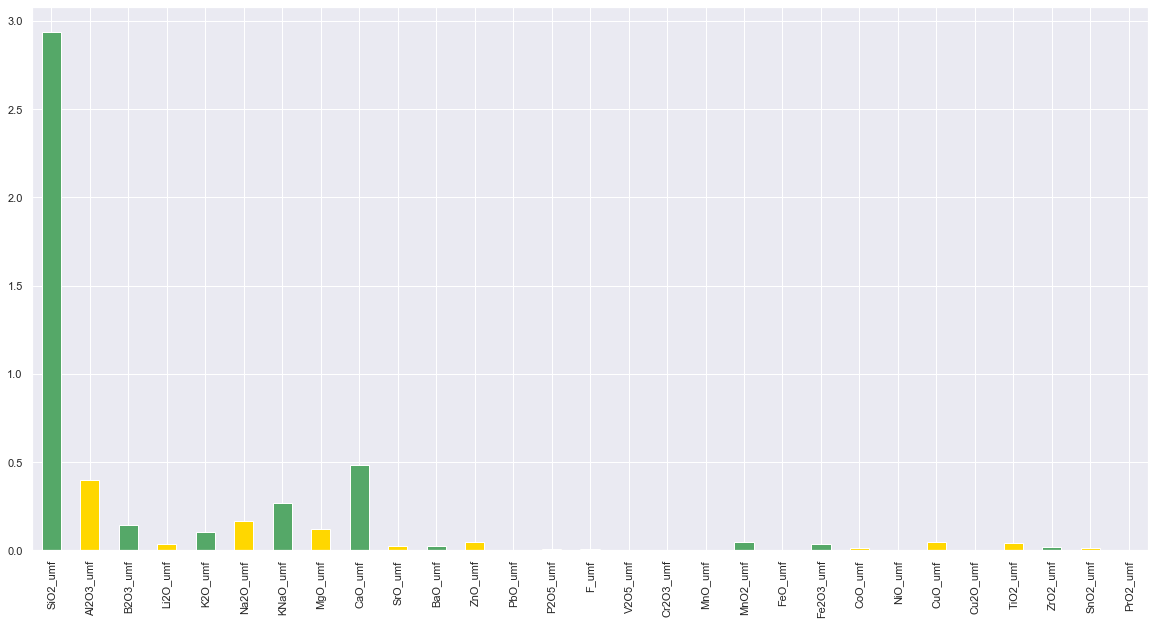

In [2084]:
percent_df=pd.DataFrame()
percent_df = glaze_df[['SiO2_umf','Al2O3_umf','B2O3_umf',
                        'Li2O_umf','K2O_umf','Na2O_umf',
                        'KNaO_umf','MgO_umf','CaO_umf',
                        'SrO_umf','BaO_umf','ZnO_umf',
                        'PbO_umf','P2O5_umf','F_umf',
                        'V2O5_umf','Cr2O3_umf','MnO_umf',
                        'MnO2_umf','FeO_umf','Fe2O3_umf',
                        'CoO_umf','NiO_umf','CuO_umf',
                        'Cu2O_umf','TiO2_umf','ZrO2_umf',
                        'SnO2_umf','PrO2_umf']].mean()
percent_df.head()
plt.figure(figsize=(20,10))
percent_df.plot.bar(color=['g','gold'])

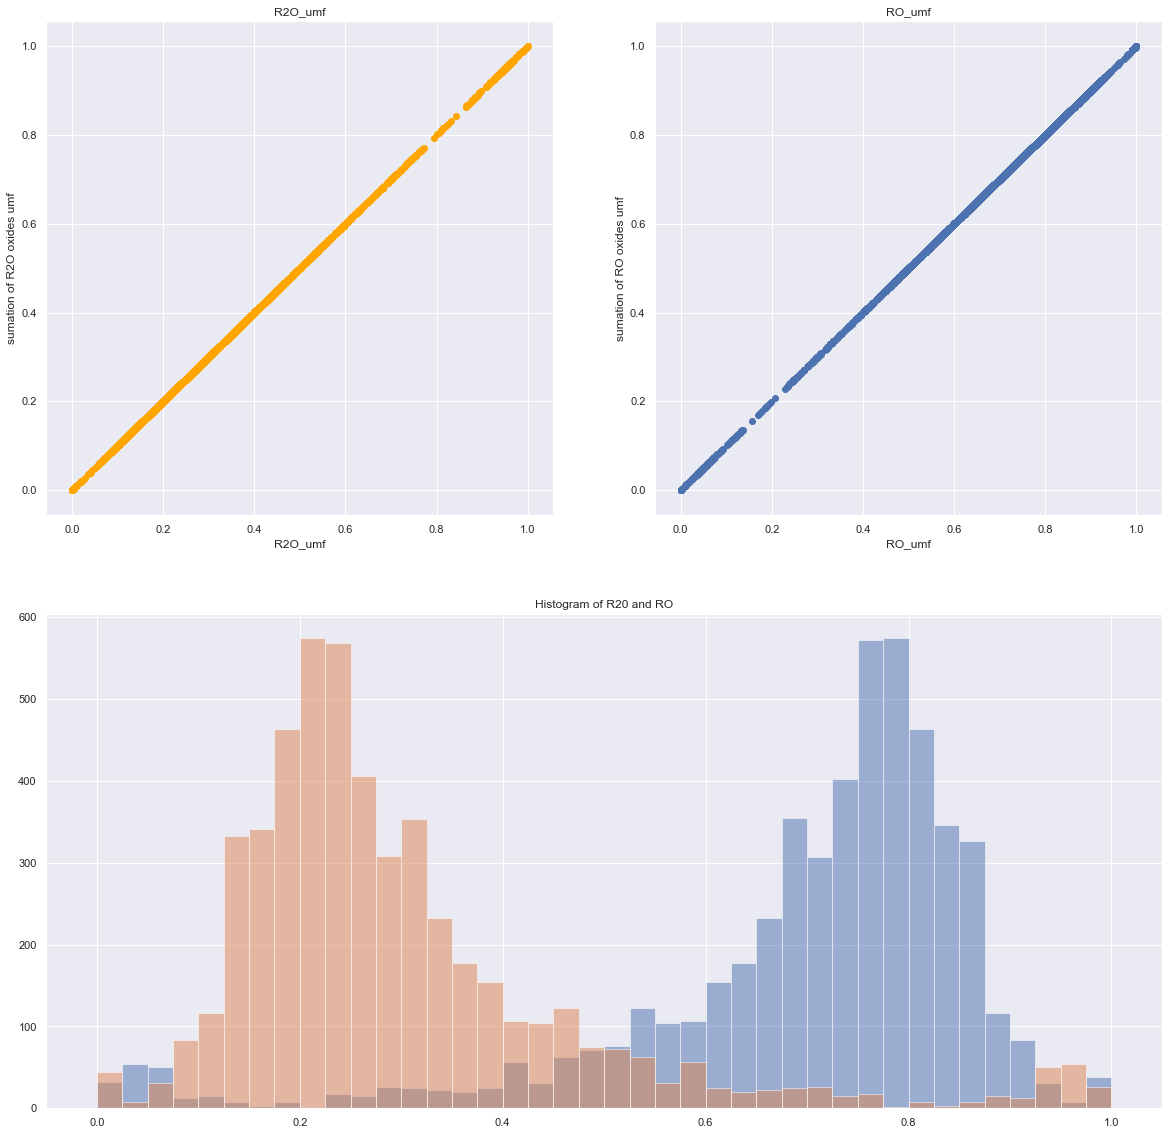

In [2085]:
#test to see what metal oxides are included in RO and R2O

glaze_df['R2O_umf_sum']=glaze_df['Li2O_umf']+glaze_df['K2O_umf']+glaze_df['Na2O_umf']

glaze_df['RO_umf_sum']=glaze_df['MgO_umf']+glaze_df['CaO_umf']+glaze_df['SrO_umf']+glaze_df['BaO_umf']+glaze_df['ZnO_umf']+glaze_df['PbO_umf']+glaze_df['MnO_umf']
#glaze_df['P2O5_umf']
##+glaze_df['KNaO_umf']
#+glaze_df['PbO_umf']#+
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.scatter(glaze_df.R2O_umf_sum,
            glaze_df.R2O_umf,
            color = 'orange')
plt.xlabel('R2O_umf')
plt.ylabel('sumation of R2O oxides umf')
plt.title('R2O_umf')

plt.subplot(2,2,2)
plt.scatter(glaze_df.RO_umf_sum,glaze_df.RO_umf)
plt.ylabel('sumation of RO oxides umf')
plt.xlabel('RO_umf')
plt.title('RO_umf')


plt.subplot(2,1,2)
glaze_df[['R2O_umf','RO_umf' ]].describe()
plt.hist(glaze_df['RO_umf' ],bins = 40,alpha = 0.5)
plt.hist(glaze_df['R2O_umf'],bins = 40,alpha = 0.5)
plt.title('Histogram of R20 and RO')
plt.show()
#glaze_df[['R2O_umf','RO_umf' ]].describe()

In the diagram above the histogram of R2O and RO can be seen. In a Unity Molecular Formula the sum of the Fluxes R2O and RO are set equal to one, this explains the symetry in the histograms seen above. All other materials are taken as a ratio of the fluxes in moles. the scatter plots above are there to specify which metal oxides are being sumated to form R2O and RO Fluxes. 
RO fluxes include oxides with : Magnesium, Calcium, Strontium, Barium, Zinc, Lead, and Manganese. 
R2O Fluxes include oxides with: Lithium, Sodium, Potasium. 

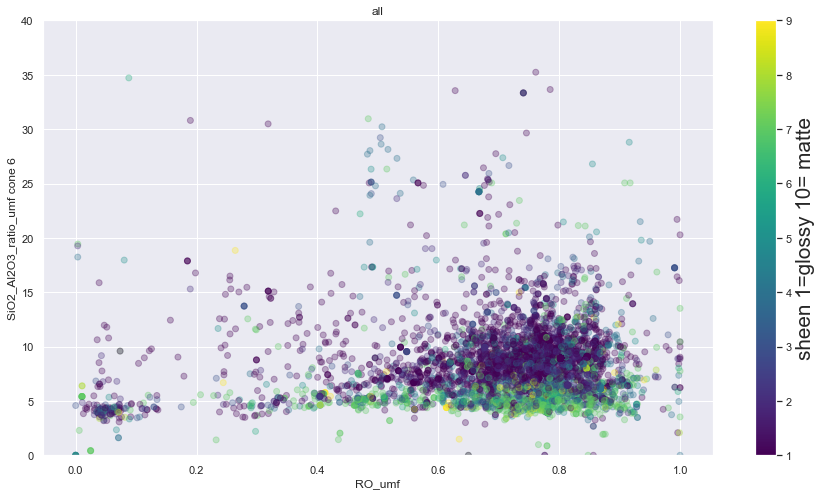

In [2086]:
plt.figure(figsize=(15,8))

xvar4 = glaze_df['RO_umf']
yvar4 = glaze_df['SiO2_Al2O3_ratio_umf']
cmap2 = plt.cm.viridis
norm2 = matplotlib.colors.Normalize(vmin=glaze_df.sheen_value.min(), vmax=glaze_df.sheen_value.max())
c2 = cmap2(norm2(glaze_df.sheen_value.values))

plt.scatter(xvar4,yvar4,c=glaze_df.sheen_value,cmap='viridis', alpha = 0.3)
plt.ylabel('SiO2_Al2O3_ratio_umf cone 6')
plt.xlabel('RO_umf')
plt.title('all')

sm2 = plt.cm.ScalarMappable(cmap=cmap2, norm=norm2)
plt.colorbar(sm2).set_label('sheen 1=glossy 10= matte', rotation=90,fontsize = 'xx-large')
plt.ylim(0,40)

plt.show()

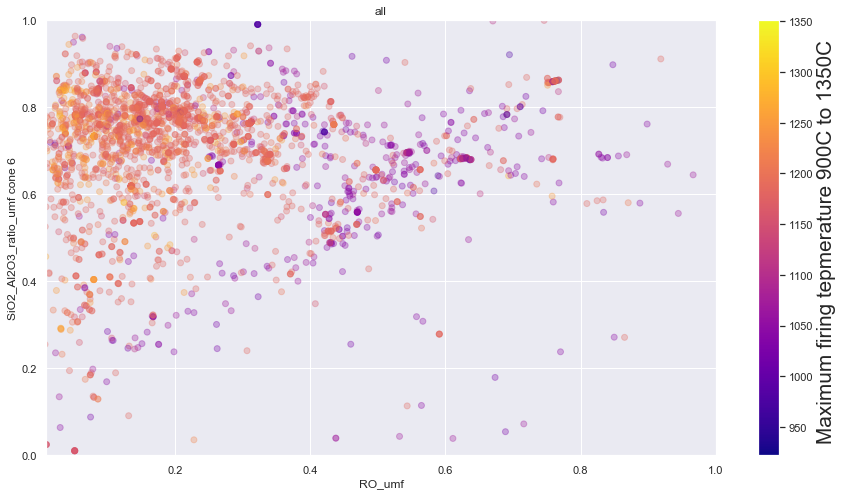

In [2087]:
plt.figure(figsize=(15,8))

xvar4 = glaze_df['B2O3_umf']
yvar4 = glaze_df['RO_umf']
cmap2 = plt.cm.plasma
norm2 = matplotlib.colors.Normalize(vmin=glaze_df.to_Degrees_C.min(), vmax=glaze_df.to_Degrees_C.max())
c2 = cmap2(norm2(glaze_df.to_Degrees_C.values))

plt.scatter(xvar4,yvar4,c=glaze_df.to_Degrees_C,cmap='plasma', alpha = 0.3)
plt.ylabel('SiO2_Al2O3_ratio_umf cone 6')
plt.xlabel('RO_umf')
plt.title('all')

sm2 = plt.cm.ScalarMappable(cmap=cmap2, norm=norm2)
plt.colorbar(sm2).set_label('Maximum firing tepmerature 900C to 1350C ', rotation=90,fontsize = 'xx-large')
plt.ylim(0,1)
plt.xlim(0.01,1)

plt.show()

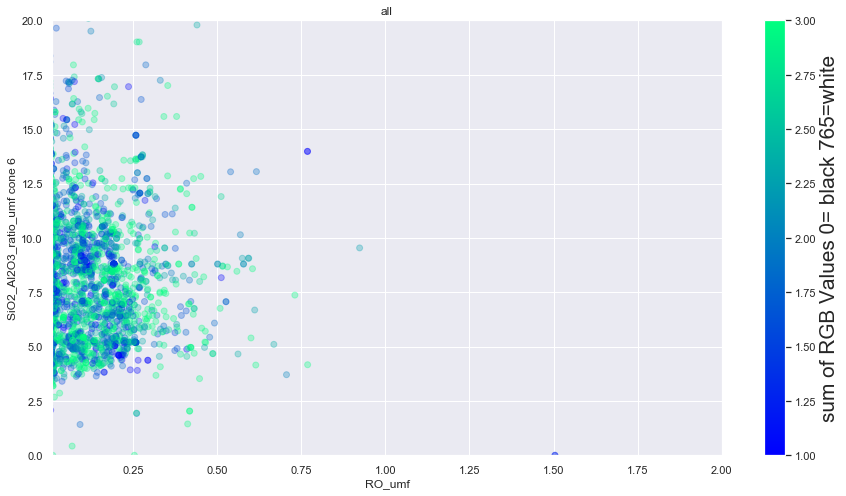

In [2088]:
plt.figure(figsize=(15,8))

xvar4 = glaze_df['opacifier_sum']
yvar4 = glaze_df['SiO2_Al2O3_ratio_umf']
cmap2 = plt.cm.winter
norm2 = matplotlib.colors.Normalize(vmin=glaze_df.opacity_value.min(), vmax=glaze_df.opacity_value.max())
c2 = cmap2(norm2(glaze_df.opacity_value.values))

plt.scatter(xvar4,yvar4,c=glaze_df.sum_color,cmap='winter', alpha = 0.3)
plt.ylabel('SiO2_Al2O3_ratio_umf cone 6')
plt.xlabel('RO_umf')
plt.title('all')

sm2 = plt.cm.ScalarMappable(cmap=cmap2, norm=norm2)
plt.colorbar(sm2).set_label('sum of RGB Values 0= black 765=white', rotation=90,fontsize = 'xx-large')
plt.ylim(0,20)
plt.xlim(0.01,2)

plt.show()

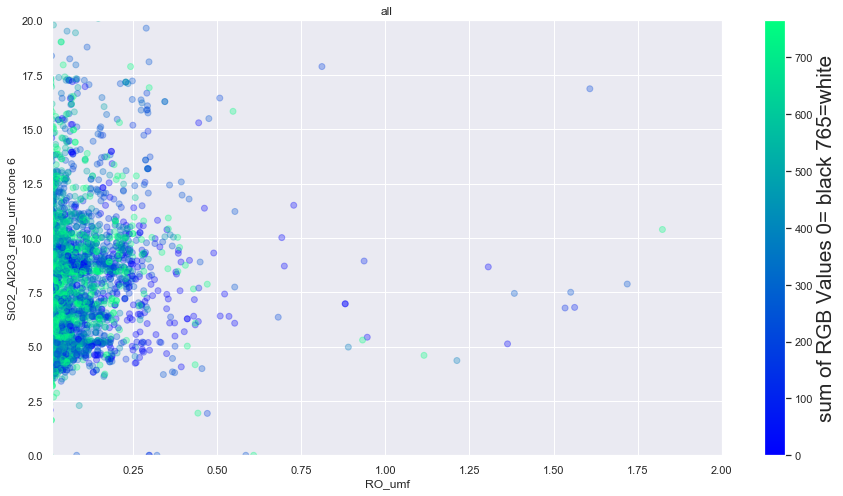

In [2089]:
plt.figure(figsize=(15,8))

xvar4 = glaze_df['colorant_oxide_sum']
yvar4 = glaze_df['SiO2_Al2O3_ratio_umf']
cmap2 = plt.cm.winter
norm2 = matplotlib.colors.Normalize(vmin=glaze_df.sum_color.min(), vmax=glaze_df.sum_color.max())
c2 = cmap2(norm2(glaze_df.sum_color.values))

plt.scatter(xvar4,yvar4,c=glaze_df.sum_color,cmap='winter', alpha = 0.3)
plt.ylabel('SiO2_Al2O3_ratio_umf cone 6')
plt.xlabel('RO_umf')
plt.title('all')

sm2 = plt.cm.ScalarMappable(cmap=cmap2, norm=norm2)
plt.colorbar(sm2).set_label('sum of RGB Values 0= black 765=white', rotation=90,fontsize = 'xx-large')
plt.ylim(0,20)
plt.xlim(0.01,2)

plt.show()

(-0.1, 2)

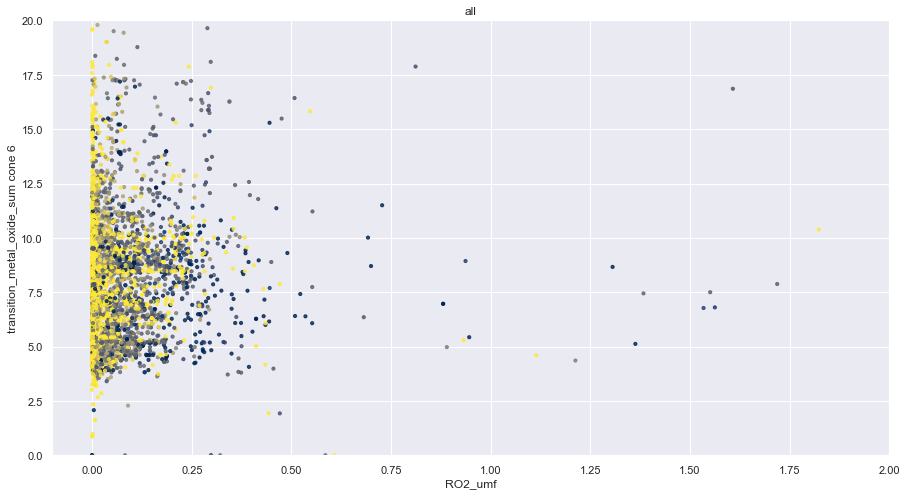

In [2090]:
plt.figure(figsize=(15,8))

xvar3 = glaze_df['colorant_oxide_sum']
yvar3 = glaze_df['SiO2_Al2O3_ratio_umf']
plt.scatter(xvar3,yvar3,
            c=glaze_df['sum_color']
            ,cmap='cividis',s=10, alpha = 0.8)
plt.ylabel('transition_metal_oxide_sum cone 6')
plt.xlabel('RO2_umf')
plt.title('all')
plt.ylim(0,20)
plt.xlim(-0.1,2)

In [2193]:
from sklearn.preprocessing import StandardScaler


X = glaze_df[[  
    'to_Degrees_C','sheen_value',
                  'sum_color',
                    'SiO2_umf',
                    'Al2O3_umf',
                    'B2O3_umf', 
                    'SiO2_Al2O3_ratio_umf',
                    'R2O_umf',
                    'RO_umf','colorant_oxide_sum','opacifier_sum']].fillna(0)

scaler = StandardScaler()
X_std = scaler.fit_transform(X)


#'P2O5_umf',colorant_oxide_sum','opacifier_sum' from_Degrees_C 'sheen_value',
#                  'sum_color',
                #'is_glossy',


# Conduct UMAP for cluster visualization purposes 

In [2195]:
import umap

# Dimensionality reduction 
#UMAP
# try setting min distance to 0.1 or 0.15
#time_start = time.time()

umap_results = umap.UMAP(n_neighbors=15,
                      min_dist=0.2,
                      #metric='correlation',
                       #metric='cosine',
                      metric='euclidean',
                        n_components=2,
                        random_state=10
                        ).fit_transform(X_std)





#print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [2196]:
#adding the UMAP Projections to the dataframe 
for n in range(2):
    glaze_df['UMAP{}'.format(n+1)]= umap_results[:, n]


#glaze_df[['UMAP1','UMAP2']]


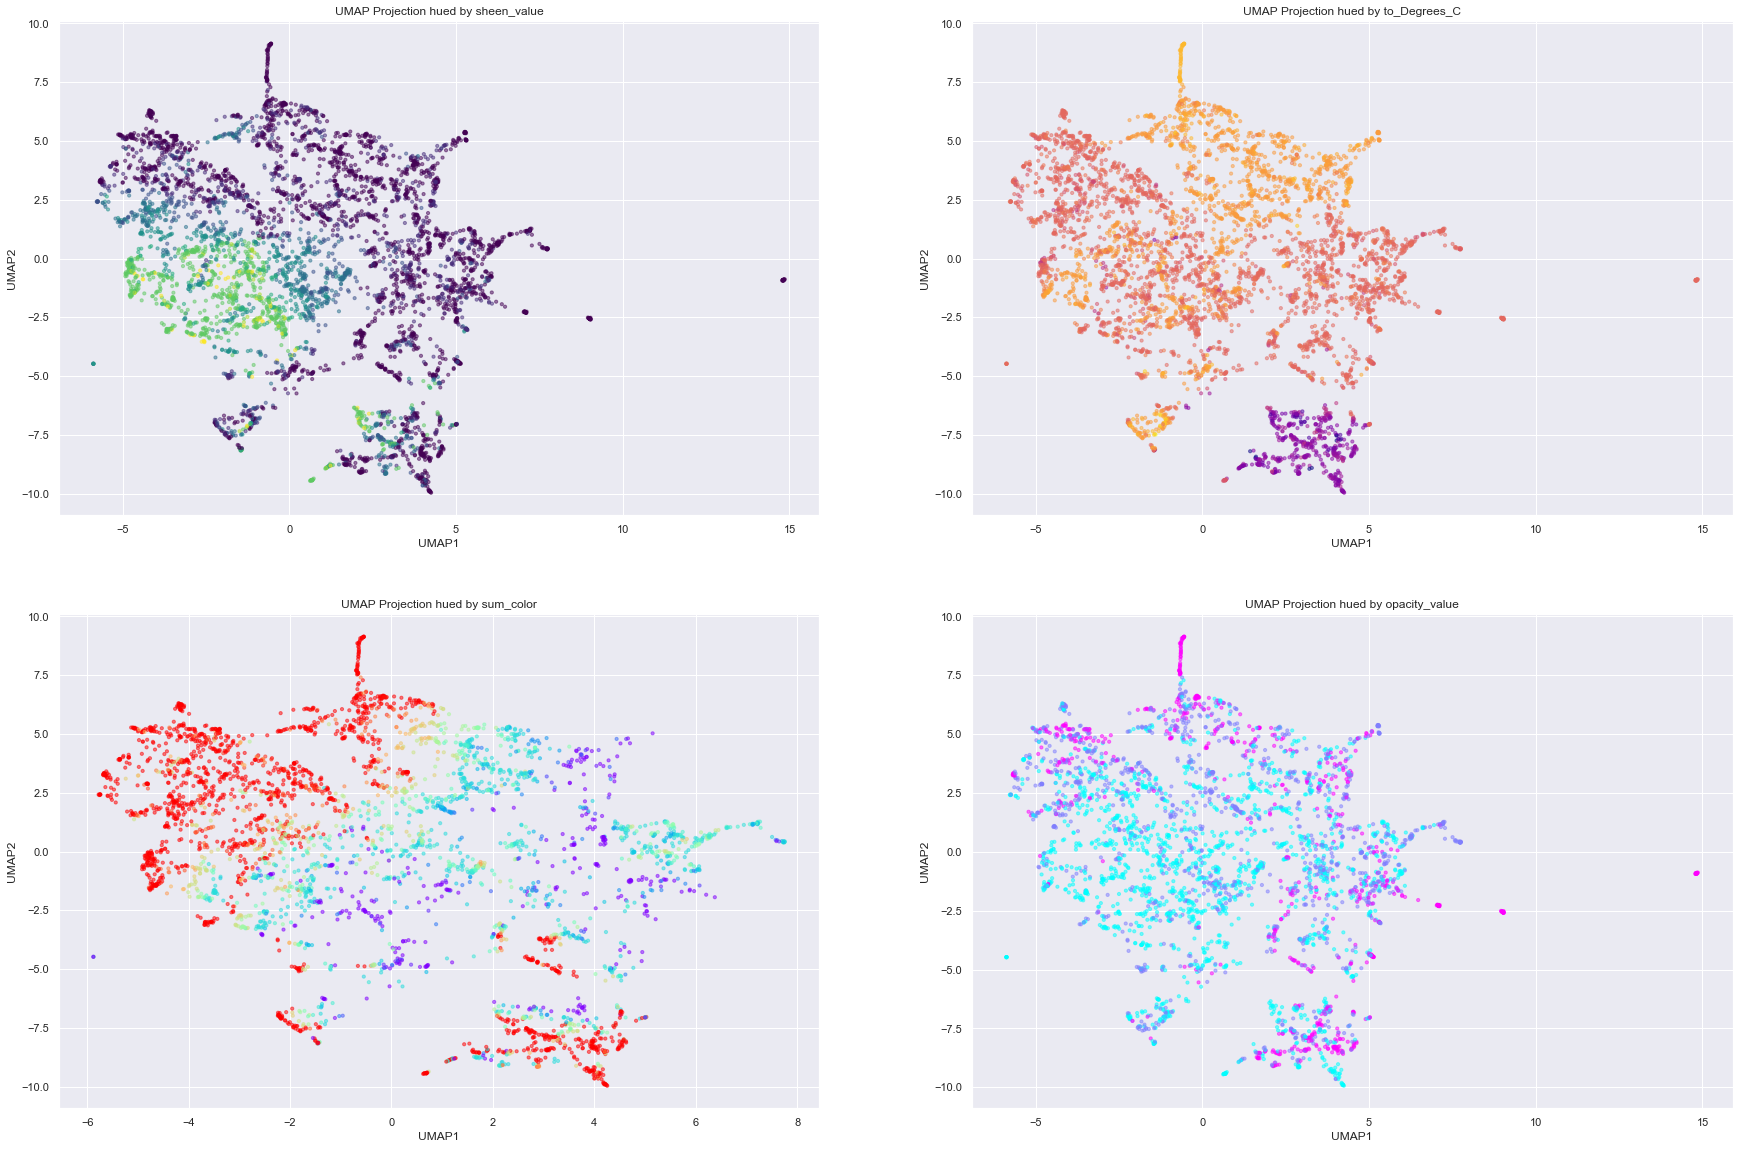

In [2197]:
hue_list=[['sheen_value','viridis'],
          ['to_Degrees_C','plasma'],
          ['sum_color','rainbow'],
          ['opacity_value','cool']]
plt.figure(figsize=(30,20))
sns.set(rc={ 'figure.facecolor':'white'})

for i,hue in enumerate(hue_list):
    plt.subplot(2,2,i+1)
    plt.title('UMAP')
    plt.scatter(glaze_df['UMAP1'],  
                glaze_df['UMAP2'],
                c=glaze_df[hue[0]] ,
                s=10,
                cmap=hue[1],
                alpha = .5)
    plt.ylabel('UMAP2')
    plt.xlabel('UMAP1')
    plt.title('UMAP Projection hued by {}'.format(hue[0]))

In [2198]:
umap_std = scaler.fit_transform(umap_results)
for n in range(2):
    glaze_df['UMAP_std{}'.format(n+1)]= umap_std[:, n]



# Split Data for Cluster Evaluation

In [2236]:
from sklearn.model_selection import train_test_split
#split the dataset to compare clustering techniques
X_std1, X_std2, glaze_df_half1, glaze_df_half2,umap_std1,umap_std2 = train_test_split(
    X_std,
    glaze_df,umap_std,
    test_size=0.5,
    random_state=13579)

print(len(glaze_df_half1))
print(len(glaze_df_half2))
print(len(glaze_df))

2577
2577
5154


## Clustering

there are a lot of glazes that fall well outside the chemistry of a normal glaze, these are often effects glazes that are used for a particular physical or visual quality, an example might be a metal saturate glaze that mimics the look of metal, or a crystalin glaze that forms crystals from devitrified silica. It is likely that DBSCAN will be usefull however Kmeans and Gaussian Mixture Models will also be applied and compaired. 

### K-means Clustering¶

In [2200]:
from sklearn.cluster import KMeans


Sum_of_squared_distances = []
Mannhattan_silhouette_scores = []
Euclidean_silhouette_scores = []
cosine_silhouette_scores = []

K = range(1,25)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(umap_std)
    Sum_of_squared_distances.append(km.inertia_)
    try:
        klusters = km.fit_predict(umap_std)
        Mannhattan_silhouette_scores.append(metrics.silhouette_score(umap_std, klusters, metric='manhattan'))
        Euclidean_silhouette_scores.append(metrics.silhouette_score(umap_std, klusters, metric='euclidean'))
        cosine_silhouette_scores.append(metrics.silhouette_score(umap_std, klusters, metric='cosine'))

    except:
        Mannhattan_silhouette_scores.append(1)
        Euclidean_silhouette_scores.append(1)
        cosine_silhouette_scores.append(1)
        None


plt.show()

Text(0.5, 1.0, 'Silhouet Scores For Optimal k')

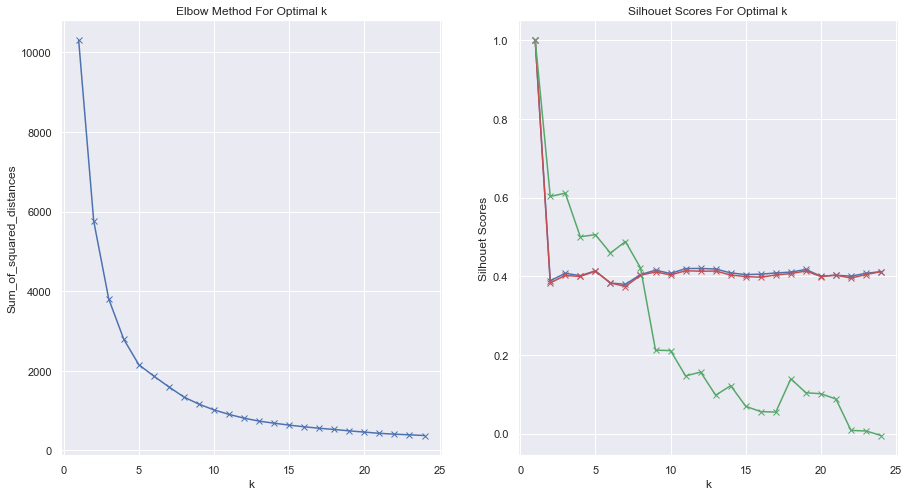

In [2201]:
from sklearn import datasets, metrics
plt.figure(figsize=(15,8))  
plt.subplot(1,2,1)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.subplot(1,2,2)
plt.plot(K, Euclidean_silhouette_scores, 'bx-',color='b')
plt.plot(K, Mannhattan_silhouette_scores, 'bx-',color='r')
plt.plot(K, cosine_silhouette_scores, 'bx-',color='g')

plt.xlabel('k')
plt.ylabel('Silhouet Scores')
plt.title('Silhouet Scores For Optimal k')



In [2241]:
from sklearn import datasets, metrics
n_clusters=9
km = KMeans(n_clusters,)
K_clusters1 = km.fit_predict(umap_std1)
K_clusters2 = km.fit_predict(umap_std2)
glaze_df_half1['K_clusters']=K_clusters1
glaze_df_half2['K_clusters']=K_clusters2

K_clusters = km.fit_predict(umap_std)

glaze_df['K_clusters']=K_clusters

sil_score = metrics.silhouette_score(umap_std, K_clusters, metric='euclidean')
if sil_score>0:
    print("{} the silhouette score is positive\n the preseence of {} clusters is likely".format(sil_score,n_clusters))

else:
    print("{} the silhouette score is negative\n the preseence of {} clusters is not likely".format(sil_score,n_clusters))


0.4117647111415863 the silhouette score is positive
 the preseence of 9 clusters is likely


0.40118831396102905 the silhouette score for group1
0.4182283282279968 the silhouette score for group2
0.4117647111415863 the silhouette score for all data


 cluster 0 has 838 datapoints
 cluster 1 has 759 datapoints
 cluster 2 has 713 datapoints
 cluster 3 has 668 datapoints
 cluster 4 has 639 datapoints
 cluster 5 has 603 datapoints
 cluster 6 has 528 datapoints
 cluster 7 has 297 datapoints
 cluster 8 has 109 datapoints


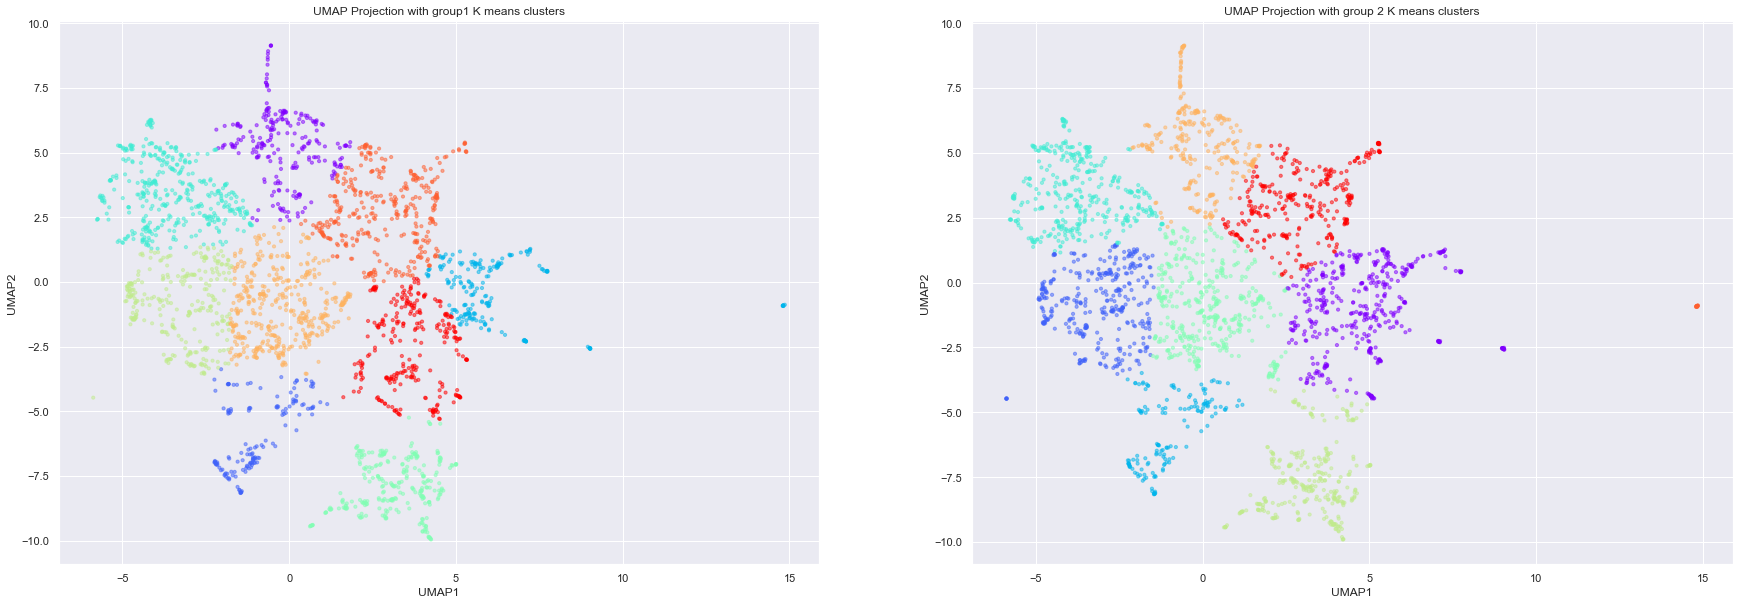

In [2242]:
sil_score = metrics.silhouette_score(umap_std, K_clusters, metric='euclidean')
sil_score1 = metrics.silhouette_score(umap_std1, K_clusters1, metric='euclidean')
sil_score2 = metrics.silhouette_score(umap_std2, K_clusters2, metric='euclidean')


print("{} the silhouette score for group1".format(sil_score1))
print("{} the silhouette score for group2".format(sil_score2))
print("{} the silhouette score for all data".format(sil_score))


#print(metrics.silhouette_score(I_std, K_clusters, metric='euclidean'))


#plot the first two results of each reduction technique
plt.figure(figsize=(30,10))
sns.set(rc={ 'figure.facecolor':'white'})

plt.subplot(1,2,1)
plt.title('UMAP')

plt.scatter(glaze_df_half1['UMAP1'],
            glaze_df_half1['UMAP2'],
            c=glaze_df_half1['K_clusters'] ,
            s=10,
            cmap='rainbow',
            alpha = .5)
plt.ylabel('UMAP2')
plt.xlabel('UMAP1')
plt.title('UMAP Projection with group1 K means clusters')


plt.subplot(1,2,2)
plt.title('UMAP')

plt.scatter(glaze_df_half2['UMAP1'],
            glaze_df_half2['UMAP2'],
            c=glaze_df_half2['K_clusters'],
            s=10,
            cmap='rainbow',
             alpha = .5)
plt.ylabel('UMAP2')
plt.xlabel('UMAP1')
plt.title('UMAP Projection with group 2 K means clusters')



labels = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)
#print(metrics.silhouette_score(X_std, labels, metric='euclidean'))
num_cluster=[]
num_cluster = glaze_df['K_clusters'].value_counts().to_list()
print('\n')
for i, num in enumerate( num_cluster):
    print(' cluster {} has {} datapoints'.format(i,num))

(0, 10)

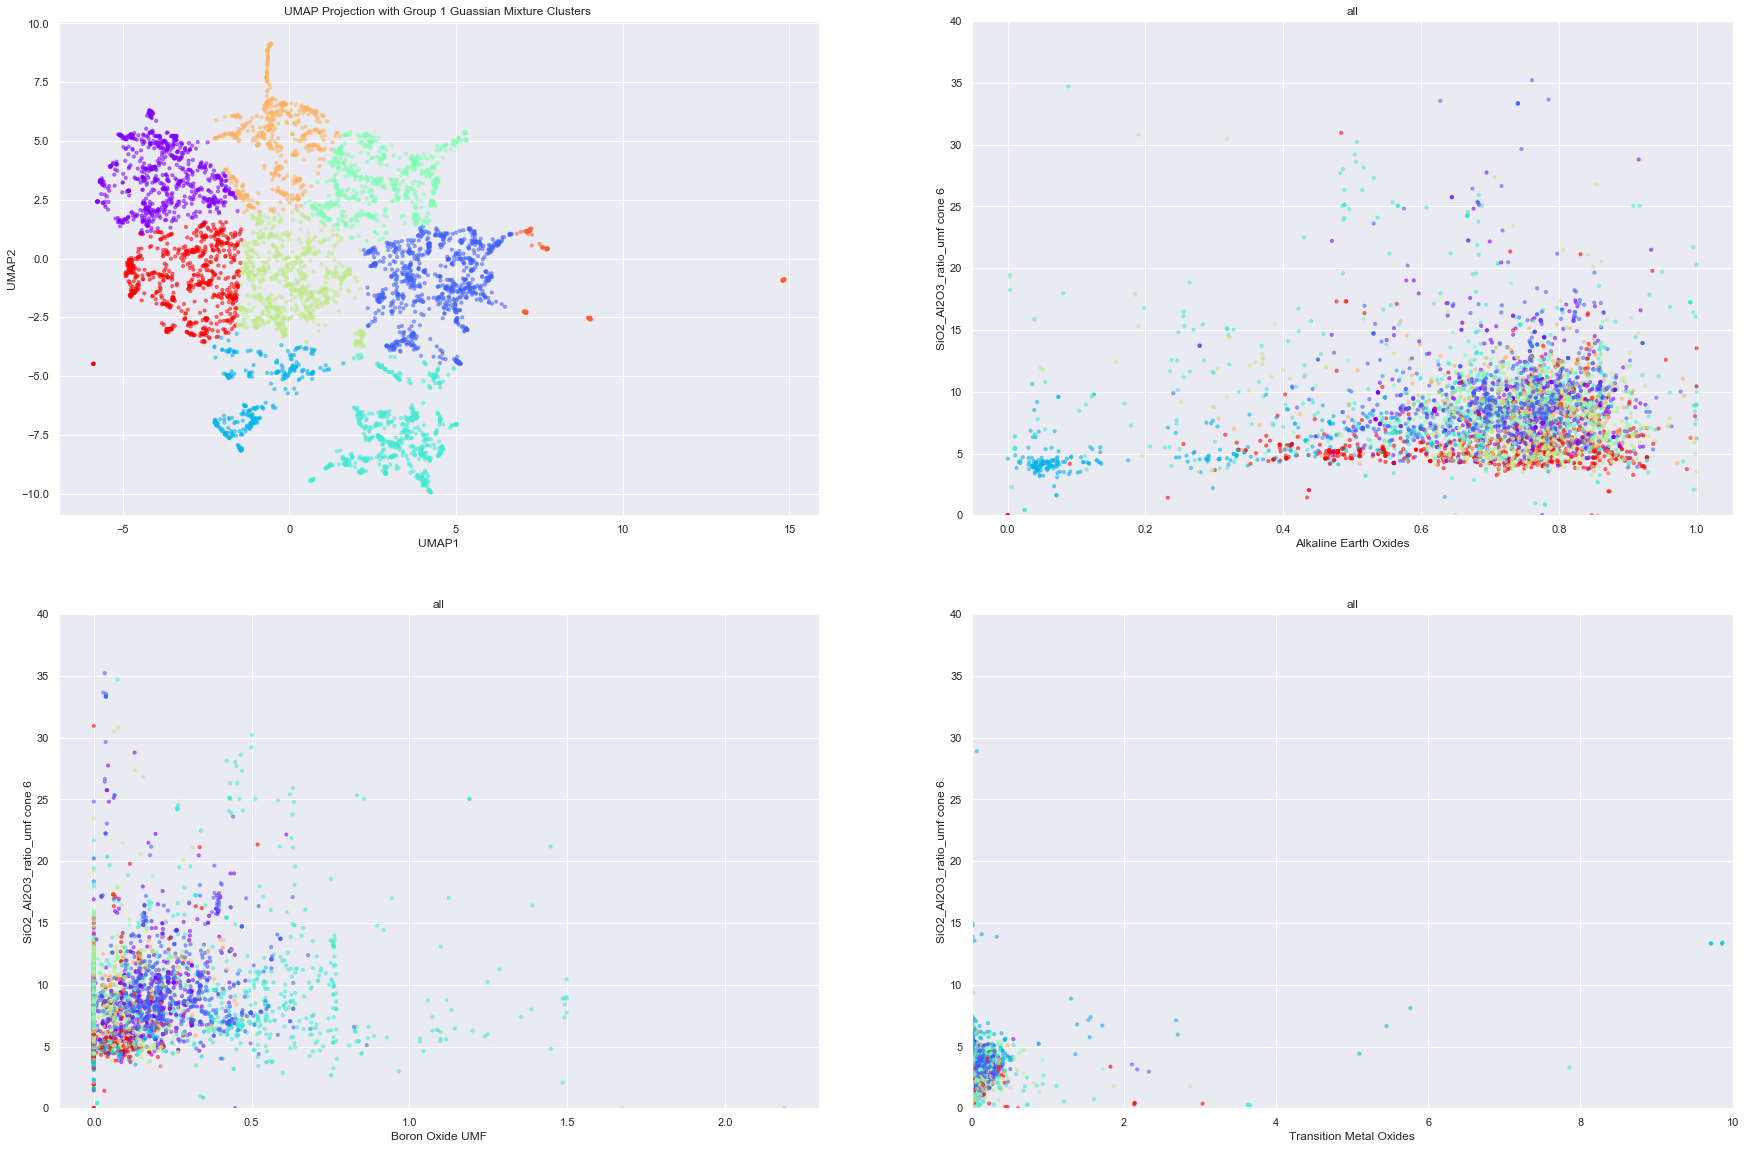

In [2243]:
plt.figure(figsize=(30,20))

plt.subplot(2,2,1)
plt.title('UMAP')

plt.scatter(glaze_df['UMAP1'],  glaze_df['UMAP2'],
            c=glaze_df['K_clusters'],s=10,cmap='rainbow',
            alpha = .5)
plt.ylabel('UMAP2')
plt.xlabel('UMAP1')
plt.title('UMAP Projection with Group 1 Guassian Mixture Clusters ')

plt.subplot(2,2,2)
xvar1 = glaze_df['RO_umf']
yvar1 = glaze_df['SiO2_Al2O3_ratio_umf']
plt.scatter(xvar1,yvar1,
            c=glaze_df['K_clusters'],
            cmap='rainbow',
            s=10, alpha = 0.5)
plt.ylabel('SiO2_Al2O3_ratio_umf cone 6')
plt.xlabel('Alkaline Earth Oxides')
plt.title('all')
plt.ylim(0,40)


plt.subplot(2,2,3)
xvar1 = glaze_df['B2O3_umf']
yvar1 = glaze_df['SiO2_Al2O3_ratio_umf']
plt.scatter(xvar1,yvar1,
            c=glaze_df['K_clusters'],
            cmap='rainbow',
            s=10, alpha = 0.5)
plt.ylabel('SiO2_Al2O3_ratio_umf cone 6')
plt.xlabel('Boron Oxide UMF')
plt.title('all')
plt.ylim(0,40)


plt.subplot(2,2,4)
xvar1 = glaze_df['colorant_oxide_sum']
yvar1 = glaze_df['SiO2_umf']
plt.scatter(xvar1,yvar1,
            c=glaze_df['K_clusters'],
            cmap='rainbow',
            s=10, alpha = 0.5)
plt.ylabel('SiO2_Al2O3_ratio_umf cone 6')
plt.xlabel('Transition Metal Oxides')
plt.title('all')
plt.ylim(0,40)
plt.xlim(0,10)


In [2244]:
np.median([2750,1449 , 543 ,406 ,4,2 ])

474.5

In [ ]:
glaze_df.loc[glaze_df.K_clusters==2].temp_catagory.value_counts()#head(40)

In [ ]:
glaze_df.loc[glaze_df.K_clusters==3].material_type.value_counts()#head(40)

In [ ]:
from sklearn.metrics import silhouette_score

### DBSCAN

In [2262]:


#range_eps = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,]

range_eps = np.linspace(0.1,2,41)
sil_score_Epsilon_euc=[]
sil_score_Epsilon_cos=[]
sil_score_Epsilon_man=[]

for i in  range_eps:
    #print("eps value is "+str(i))
    try:
        db_euc = DBSCAN(eps=i, min_samples = 17,metric='euclidean' ).fit(X_std)
        core_samples_mask = np.zeros_like(db_euc.labels_, dtype=bool)
        core_samples_mask[db_euc.core_sample_indices_] = True
        labels_euc = db_euc.labels_
        silhouette_avg_euc = silhouette_score(X_std,labels_euc)
    except:
        silhouette_avg_euc=np.nan
    
    try:
        db_man = DBSCAN(eps=i, min_samples = 17,metric='manhattan').fit(X_std)
        core_samples_mask = np.zeros_like(db_man.labels_, dtype=bool)
        core_samples_mask[db_man.core_sample_indices_] = True
        labels_man = db_man.labels_
        silhouette_avg_man = silhouette_score(X_std,labels_man)
    except:
        silhouette_avg_man=np.nan
        
    
    sil_score_Epsilon_euc.append(silhouette_avg_euc)
    sil_score_Epsilon_man.append(silhouette_avg_man)
   
 


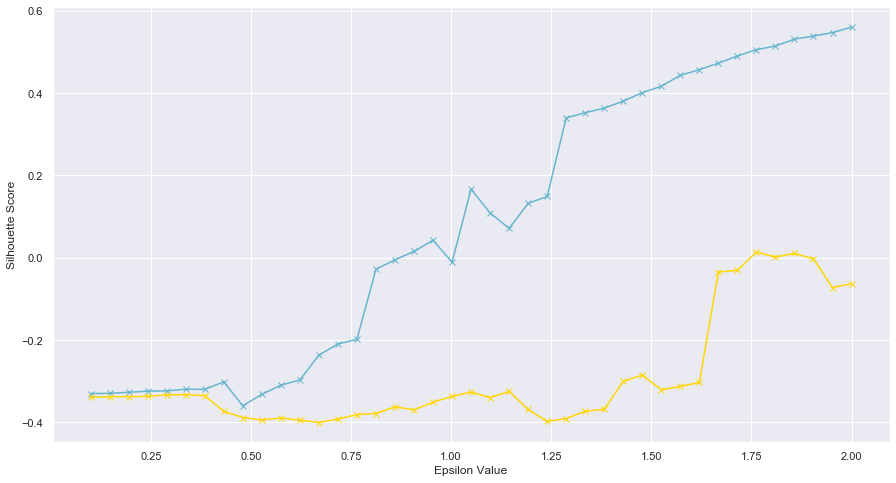

In [2255]:
plt.figure(figsize=(15,8))   
plt.plot(range_eps,sil_score_Epsilon_euc, 'bx-',color='c')
plt.plot(range_eps,sil_score_Epsilon_man, 'bx-',color='gold')

plt.xlabel('Epsilon Value')
plt.ylabel('Silhouette Score')

plt.xticks()
plt.show()

In [2310]:
#DBSCAN Clustering
from sklearn.cluster import DBSCAN

# Defining the agglomerative clustering
#working
dbscan_cluster1 = DBSCAN(eps=1.27, min_samples=10,metric = "euclidean")#produces 3 clusters
dbscan_cluster2 = DBSCAN(eps=1.27, min_samples=10,metric = "euclidean")

#test
dbscan_clusters1 = dbscan_cluster1.fit_predict(X_std1)
dbscan_clusters2 = dbscan_cluster1.fit_predict(X_std2)

dbscan_clusters = dbscan_cluster2.fit_predict(X_std)

glaze_df_half1['dbscan_clusters']=dbscan_clusters1
glaze_df_half2['dbscan_clusters']=dbscan_clusters2
glaze_df['dbscan_clusters']=dbscan_clusters

#dbscan_clusters2 = dbscan_cluster2.fit_predict(X_std)

print('cluster1',np.unique(dbscan_clusters1))
print('cluster2',np.unique(dbscan_clusters2))
print('cluster ',np.unique(dbscan_clusters))

#df['DBSCAN_clusters'] = dbscan_clusters



cluster1 [-1  0  1  2  3  4]
cluster2 [-1  0  1  2  3]
cluster  [-1  0  1  2  3]


0.11414882577254151 the silhouette score for group1
0.13671271336142646 the silhouette score for group2
0.22390902695073892 is the silhouette score for the total sample
 0    4389
-1     663
 1      81
 3      11
 2      10
Name: dbscan_clusters, dtype: int64


(0, 2)

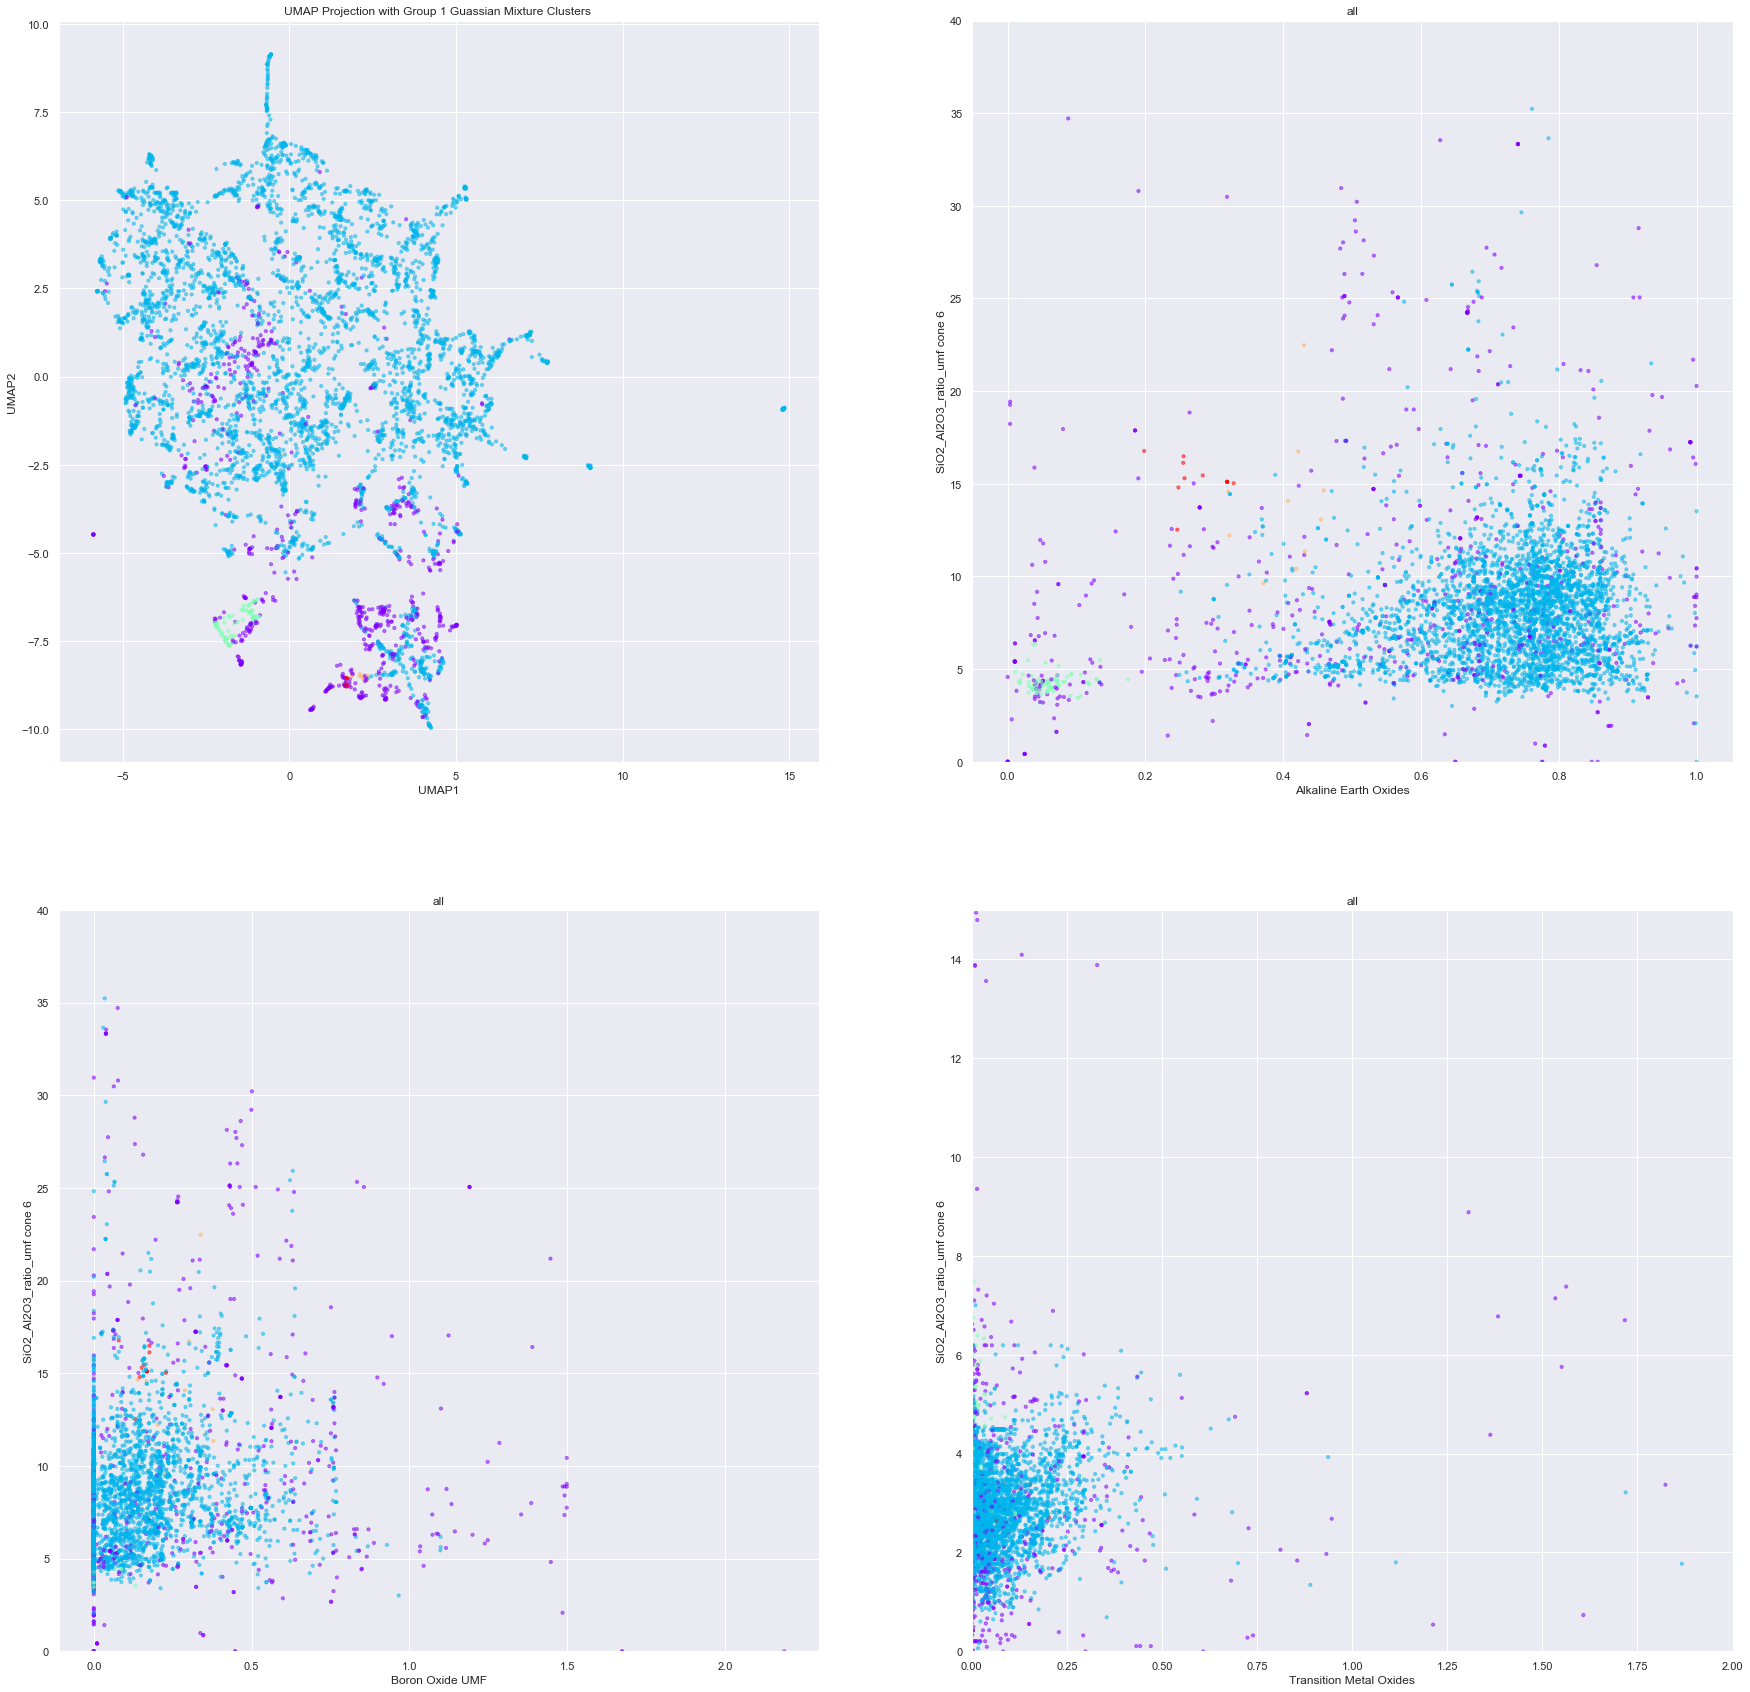

In [2312]:
#plot the first two results of each reduction technique
sil_score = metrics.silhouette_score(X_std, dbscan_clusters, metric='euclidean')
sil_score1 = metrics.silhouette_score(X_std1, dbscan_clusters1, metric='euclidean')
sil_score2 = metrics.silhouette_score(X_std2, dbscan_clusters2, metric='euclidean')


print("{} the silhouette score for group1".format(sil_score1))
print("{} the silhouette score for group2".format(sil_score2))
print("{} is the silhouette score for the total sample".format(sil_score))

#print(metrics.silhouette_score(X_std, labels, metric='euclidean'))
num_cluster=[]
num_cluster = glaze_df['dbscan_clusters'].value_counts().to_list()
print(glaze_df['dbscan_clusters'].value_counts())
#for i, num in enumerate( num_cluster):
 #   print(' cluster {} has {} datapoints'.format(i,num))



plt.figure(figsize=(30,30))
sns.set(rc={ 'figure.facecolor':'white'})

plt.subplot(2,2,1)
plt.title('UMAP')

plt.scatter(glaze_df['UMAP1'],  glaze_df['UMAP2'],
            c=glaze_df['dbscan_clusters'],s=10,cmap='rainbow',
            alpha = .5)
plt.ylabel('UMAP2')
plt.xlabel('UMAP1')
plt.title('UMAP Projection with Group 1 Guassian Mixture Clusters ')

plt.subplot(2,2,2)
xvar1 = glaze_df['RO_umf']
yvar1 = glaze_df['SiO2_Al2O3_ratio_umf']
plt.scatter(xvar1,yvar1,
            c=glaze_df['dbscan_clusters'],
            cmap='rainbow',
            s=10, alpha = 0.5)
plt.ylabel('SiO2_Al2O3_ratio_umf cone 6')
plt.xlabel('Alkaline Earth Oxides')
plt.title('all')
plt.ylim(0,40)


plt.subplot(2,2,3)
xvar1 = glaze_df['B2O3_umf']
yvar1 = glaze_df['SiO2_Al2O3_ratio_umf']
plt.scatter(xvar1,yvar1,
            c=glaze_df['dbscan_clusters'],
            cmap='rainbow',
            s=10, alpha = 0.5)
plt.ylabel('SiO2_Al2O3_ratio_umf cone 6')
plt.xlabel('Boron Oxide UMF')
plt.title('all')
plt.ylim(0,40)


plt.subplot(2,2,4)
xvar1 = glaze_df['colorant_oxide_sum']
yvar1 = glaze_df['SiO2_umf']
plt.scatter(xvar1,yvar1,
            c=glaze_df['dbscan_clusters'],
            cmap='rainbow',
            s=10, alpha = 0.5)
plt.ylabel('SiO2_Al2O3_ratio_umf cone 6')
plt.xlabel('Transition Metal Oxides')
plt.title('all')
plt.ylim(0,15)
plt.xlim(0,2)


from DBSCAN two clusters formed, Cluster Zero in red contains Alkali Glazes, these are glazes high in Alkalie earth metals  such as lithium sodium or potasium. they are prone to crazing(having a crackled texture) and are often used to make copper blue glazes. Cluster 1 is filled with much more common feldspathic glazes. Many of the glaze recipees excluded from the clusters would fall under speciallized catagories such as metalic saturates, crystaline glazes, and glazes for atmospheric firings. Many of these glazes would not be considered food safe and are even labled as such when further investegated online, however there are some traditional glazes that if properly fired might be completely safe. 

In [ ]:
glaze_df.loc[glaze_df.dbscan_clusters==4].material_type.value_counts()#head(40)

In [ ]:
glaze_df.loc[(glaze_df.dbscan_clusters==0)&(glaze_df.temp_catagory=='Low')&(glaz_df.transparency_type=='Matte')].head(40)


In [ ]:
glaze_df.material_type.loc[glaze_df.dbscan_clusters==-1].value_counts()

In [ ]:
glaze_df.loc[glaze_df.dbscan_clusters== 2].sheen_value.value_counts()#head(40)

Resplit the data to remove anomolies detected by DBSCAN

### GMM Clustering 




In [2323]:
 from sklearn.mixture import GaussianMixture

#7,'full' works well
GMM = GaussianMixture(n_components=11,
                      covariance_type='full', #'full', 'tied', 
                      tol=0.001,
                      reg_covar=1e-06,
                      max_iter=1000,
                      n_init=1,
                      init_params='random',#‘random’kmeans
                      weights_init=None,
                      means_init=None,
                      precisions_init=None,
                      random_state=None,
                      warm_start=False,
                      verbose=0,
                      verbose_interval=10)



gmm_clusters1 = GMM.fit_predict(X_std1)
gmm_clusters2 = GMM.fit_predict(X_std2)
glaze_df_half1['gmm_clusters']=gmm_clusters1
glaze_df_half2['gmm_clusters']=gmm_clusters2
gmm_clusters = GMM.fit_predict(umap_std)
glaze_df['gmm_clusters']=gmm_clusters

-0.0962710594692118 the silhouette score is negative
 the preseence of 9 clusters is not likely


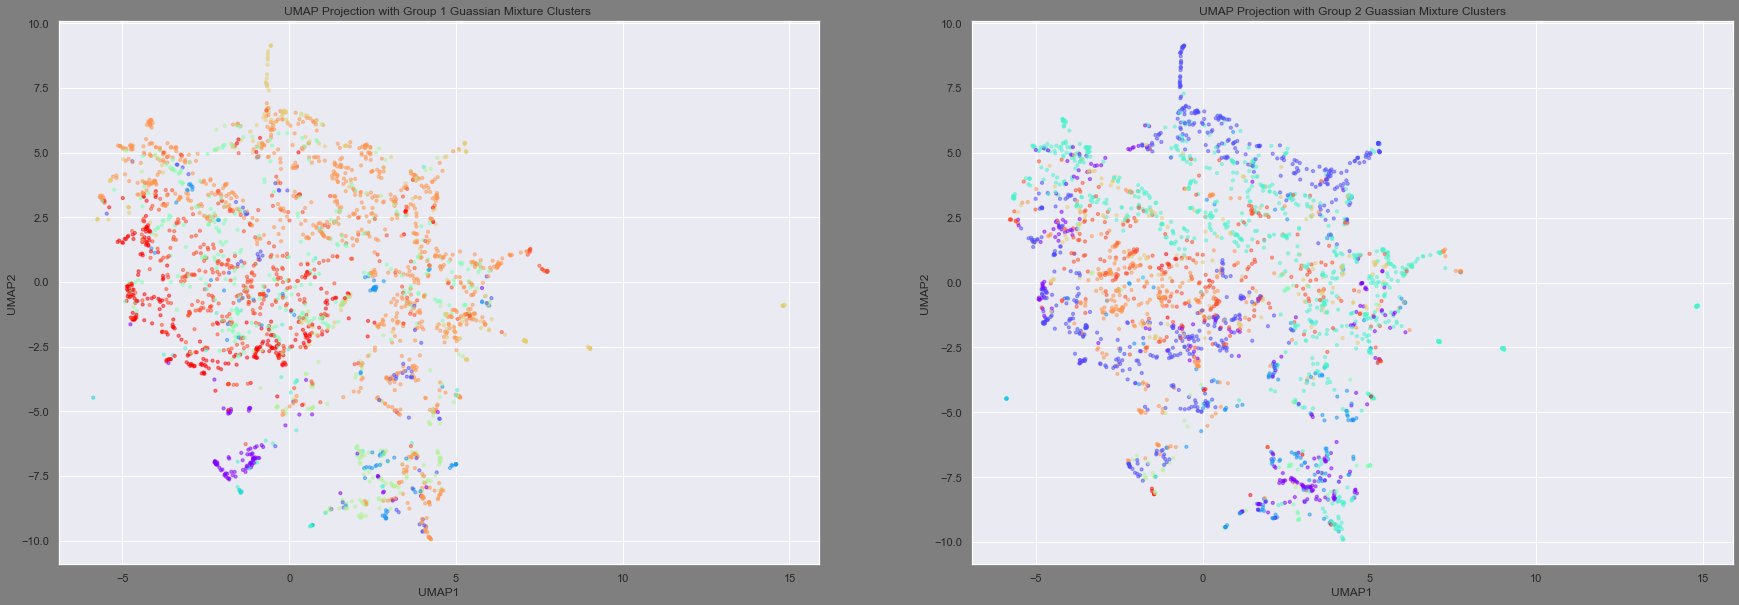

In [2324]:
sil_score = metrics.silhouette_score(umap_std, gmm_clusters, metric='mahalanobis')
if sil_score>0:
    print("{} the silhouette score is positive\n the preseence of {} clusters is likely".format(sil_score,n_clusters))

else:
    print("{} the silhouette score is negative\n the preseence of {} clusters is not likely".format(sil_score,n_clusters))


#plot the first two results of each reduction technique
plt.figure(figsize=(30,10))
sns.set(rc={ 'figure.facecolor':'white'})

plt.subplot(1,2,1)
plt.title('UMAP')

plt.scatter(glaze_df_half1['UMAP1'],  glaze_df_half1['UMAP2'],
            c=glaze_df_half1['gmm_clusters'],s=10,cmap='rainbow',
            alpha = .5)
plt.ylabel('UMAP2')
plt.xlabel('UMAP1')
plt.title('UMAP Projection with Group 1 Guassian Mixture Clusters ')

plt.subplot(1,2,2)
plt.title('UMAP')

plt.scatter(glaze_df_half2['UMAP1'],  glaze_df_half2['UMAP2'],
            c=glaze_df_half2['gmm_clusters'],s=10,cmap='rainbow',
             alpha = .5)
plt.ylabel('UMAP2')
plt.xlabel('UMAP1')
plt.title('UMAP Projection with Group 2 Guassian Mixture Clusters')

plt.show()

## Explore Clusters 

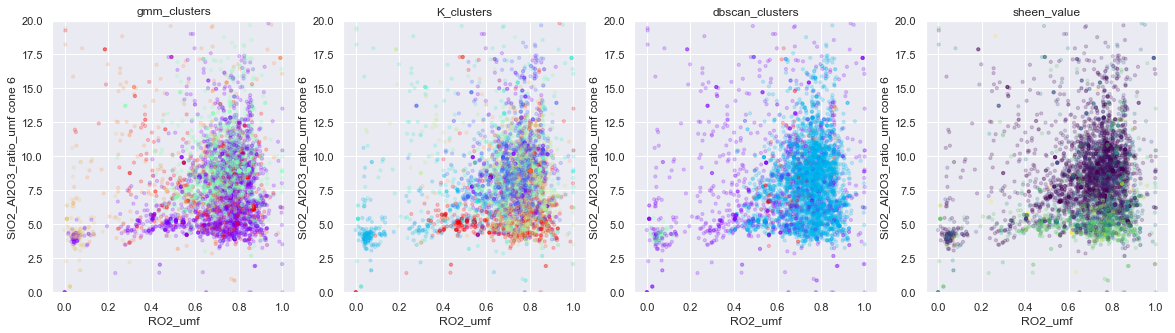

In [2248]:
 cluster_list=[['gmm_clusters','rainbow'],
               ['K_clusters','rainbow'],
               ['dbscan_clusters','rainbow'],
               ['sheen_value','viridis']]
plt.figure(figsize=(20,5))

for i, cluster in enumerate(cluster_list):
    plt.subplot(1,4,i+1)
    xvar1 = glaze_df['RO_umf']
    yvar1 = glaze_df['SiO2_Al2O3_ratio_umf']
    hue = glaze_df[cluster[0]]
    color_map = cluster[1]
    plt.scatter(xvar1,yvar1,
            c=hue,
            cmap=color_map,
            s=10, 
            alpha = 0.2)
    plt.ylabel('SiO2_Al2O3_ratio_umf cone 6')
    plt.xlabel('RO2_umf')
    plt.title(cluster[0])
    plt.ylim(0,20)
    #plt.xlim(-1,3)


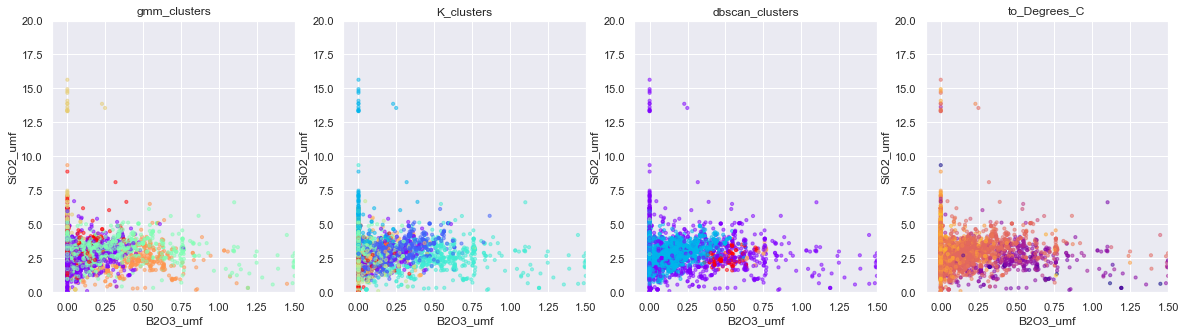

In [2249]:
cluster_list=[['gmm_clusters','rainbow'],
               ['K_clusters','rainbow'],
               ['dbscan_clusters','rainbow'],
               ['to_Degrees_C','plasma']]
plt.figure(figsize=(20,5))

for i, cluster in enumerate(cluster_list):
    plt.subplot(1,4,i+1)
    xvar1 = glaze_df['B2O3_umf']
    yvar1 = glaze_df['SiO2_umf']
    hue = glaze_df[cluster[0]]
    color_map = cluster[1]
    plt.scatter(xvar1,yvar1,
            c=hue,
            cmap=color_map,
            s=10, alpha = 0.5)
    plt.ylabel('SiO2_umf')
    plt.xlabel('B2O3_umf')
    plt.title(cluster[0])
    plt.ylim(0,20)
    plt.xlim(-.1,1.5)


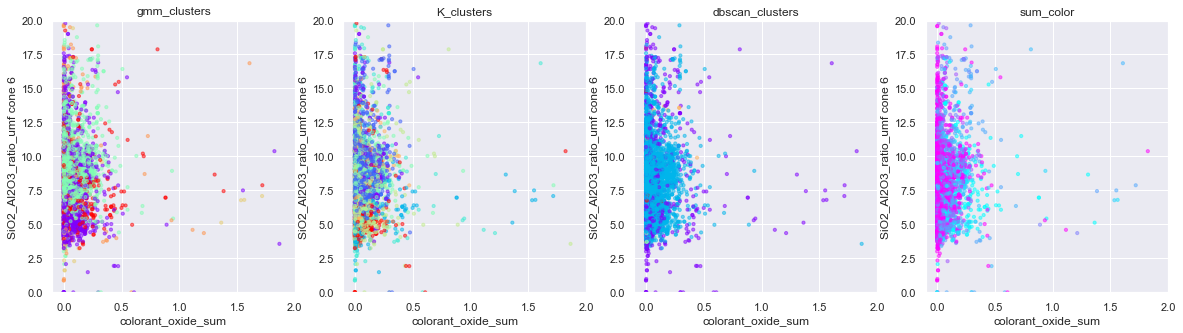

In [2250]:
cluster_list=[['gmm_clusters','rainbow'],
               ['K_clusters','rainbow'],
               ['dbscan_clusters','rainbow'],
               ['sum_color','cool']]
plt.figure(figsize=(20,5))

for i, cluster in enumerate(cluster_list):
    plt.subplot(1,4,i+1)
    xvar1 = glaze_df['colorant_oxide_sum']
    yvar1 = glaze_df['SiO2_Al2O3_ratio_umf']
    hue = glaze_df[cluster[0]]
    color_map = cluster[1]
    plt.scatter(xvar1,yvar1,
            c=hue,
            cmap=color_map,
            s=10, alpha = 0.5)
    plt.ylabel('SiO2_Al2O3_ratio_umf cone 6')
    plt.xlabel('colorant_oxide_sum')
    plt.title(cluster[0])
    plt.ylim(0,20)
    plt.xlim(-.1,2)

In [2218]:
glaze_df.loc[glaze_df.K_clusters==1].material_type.value_counts()#head(40)

White, Off-White    101
Glaze                65
Blue                 41
Yellow               39
Iron                 28
Copper               22
Clear                21
Green                20
Matte                19
Rutile               16
Ash                  16
Majolica             14
Magnesium Matte      12
Cobalt                8
Pink                  7
Crystalline           6
Shino                 5
Purple                5
Specialty             4
Black                 4
Nickel                3
Kaki, Tomato Red      2
Celadon               2
Chun, Jun             2
Red                   2
Titanium              2
Micro                 2
Crater                2
Raku                  2
Nuka                  1
Amber                 1
Oribe                 1
Turquoise             1
Barium                1
Metallic              1
Strontium             1
Manganese             1
Tea Dust              1
Name: material_type, dtype: int64

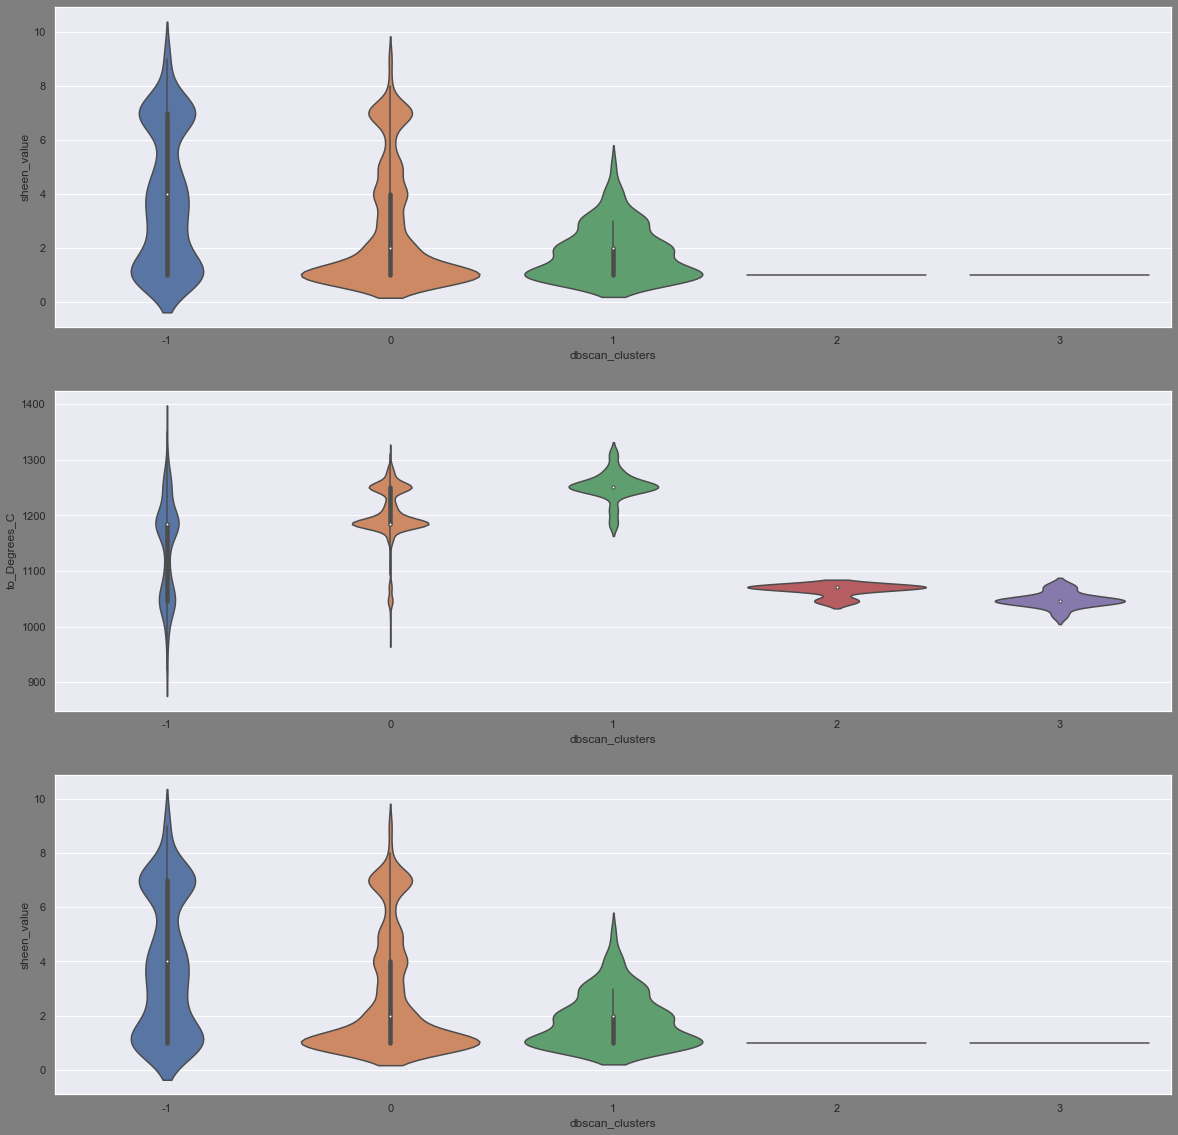

In [2321]:
# explore clusters by temperature and sheen 
plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
sns.violinplot(x="dbscan_clusters", y="sheen_value", data=glaze_df)
plt.subplot(3,1,2)
sns.violinplot(x="dbscan_clusters", y="to_Degrees_C", data=glaze_df)
plt.subplot(3,1,3)
sns.violinplot(x="dbscan_clusters", y="sheen_value", data=glaze_df)


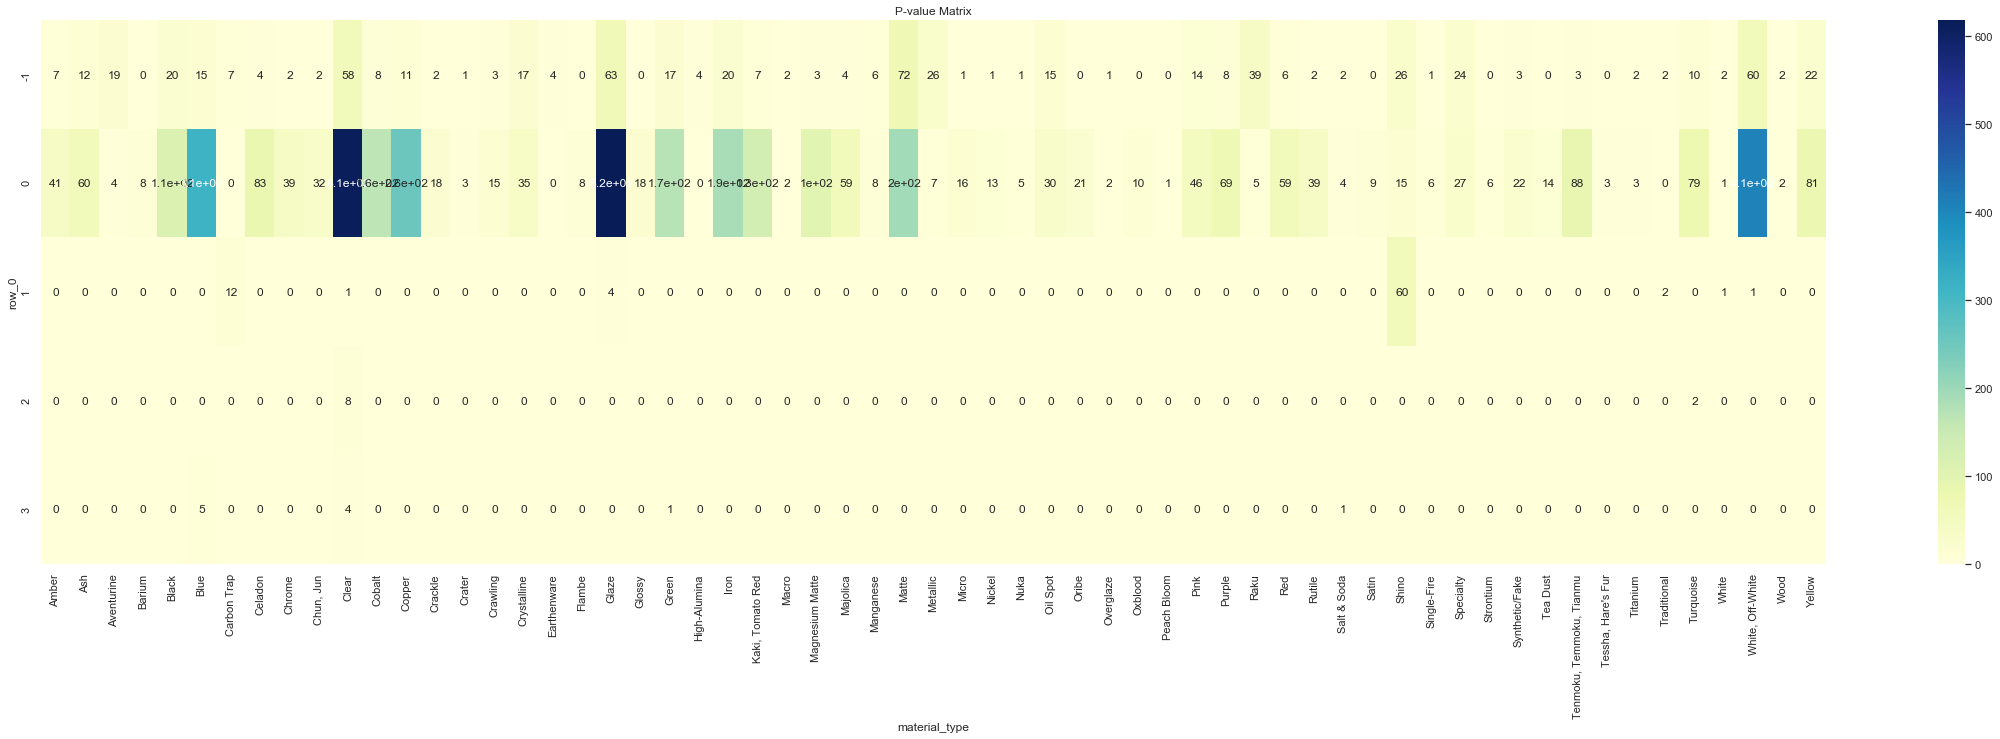

In [2313]:
cross_examin = pd.crosstab(columns = glaze_df.material_type,index =dbscan_clusters)



plt.figure(figsize=(40,10))
sns.set(rc={ 'figure.facecolor':'tab:gray'})
heat_corr = cross_examin
sns.heatmap(heat_corr, annot=True, cmap="YlGnBu") 
plt.title("P-value Matrix") 
plt.show()

plt.show()

In [2315]:
glaze_df.loc[dbscan_clusters==2].head(40)

id                                               name  created_by_user_id  material_type_id material_type  material_state_id material_state  rgb_r  rgb_g  rgb_b surface_type transparency_type from_orton_cone to_orton_cone  SiO2_percent  Al2O3_percent  B2O3_percent  Li2O_percent  K2O_percent  Na2O_percent  KNaO_percent  MgO_percent  CaO_percent  SrO_percent  BaO_percent  ZnO_percent  PbO_percent  P2O5_percent  F_percent  V2O5_percent  Cr2O3_percent  MnO_percent  MnO2_percent  FeO_percent  Fe2O3_percent  CoO_percent  NiO_percent  CuO_percent  Cu2O_percent  CdO_percent  TiO2_percent  ZrO2_percent  SnO2_percent  PrO2_percent  Pr2O3_percent  Nd2O3_percent  Ho2O3_percent  Er2O3_percent  SiO2_umf  Al2O3_umf  B2O3_umf  Li2O_umf  K2O_umf  Na2O_umf  KNaO_umf  MgO_umf  CaO_umf  SrO_umf  BaO_umf  ZnO_umf  PbO_umf  P2O5_umf  F_umf  V2O5_umf  Cr2O3_umf  MnO_umf  MnO2_umf  FeO_umf  Fe2O3_umf  CoO_umf  NiO_umf  CuO_umf  Cu2O_umf  TiO2_umf  ZrO2_umf  SnO2_umf  PrO2_umf  Pr2O3_umf  Nd2O3_umf  \
1328  1671                            Alkaline Deep Turquoise                   1               745     Turquoise                2.0     Production   64.0  224.0  209.0       Glossy       Transparent              03            03       57.2291         8.5560        7.6956         0.000       1.8350        9.0718       10.9068       0.3580       6.5588          0.0          0.0          0.0          0.0        0.0297        0.0           0.0            0.0          0.0           0.0          0.0         0.1625          0.0          0.0       2.8704           0.0          0.0        0.0394           0.0           0.0           NaN            NaN            NaN            NaN            NaN    3.2653     0.2877    0.3790    0.0000   0.0668    0.5018    0.5686   0.0305   0.4010      0.0      0.0   0.0000      0.0    0.0007    0.0       0.0        0.0      0.0       0.0      0.0     0.0035      0.0      0.0   0.1237       0.0    0.0017       0.0       0.0       0.0        0.0        0.0   
1329  1672                     Alkaline DeepTurquoise Recalc1                   1               745     Turquoise                2.0     Production   64.0  224.0  209.0       Glossy       Transparent              03            03       59.9383         7.7826        8.0366         0.000       0.0198       10.3424       10.3622       0.3690       7.3014          0.0          0.0          0.0          0.0        0.0199        0.0           0.0            0.0          0.0           0.0          0.0         0.0692          0.0          0.0       2.7180           0.0          0.0        0.0000           0.0           0.0           NaN            NaN            NaN            NaN            NaN    3.2553     0.2491    0.3767    0.0000   0.0007    0.5445    0.5452   0.0299   0.4249      0.0      0.0   0.0000      0.0    0.0005    0.0       0.0        0.0      0.0       0.0      0.0     0.0014      0.0      0.0   0.1115       0.0    0.0000       0.0       0.0       0.0        0.0        0.0   
1332  1675                         Alkaline Gill's Base no GB                   1               470         Clear                2.0     Production  255.0  255.0  255.0       Glossy       Transparent              04            03       66.3466         9.2138        4.3692         0.000       2.8511       11.1702       14.0213       0.0652       5.5138          0.0          0.0          0.0          0.0        0.0000        0.0           0.0            0.0          0.0           0.0          0.0         0.0947          0.0          0.0       0.0000           0.0          0.0        0.0000           0.0           0.0           NaN            NaN            NaN            NaN            NaN    3.5570     0.2911    0.2022    0.0000   0.0975    0.5806    0.6781   0.0052   0.3167      0.0      0.0   0.0000      0.0    0.0000    0.0       0.0        0.0      0.0       0.0      0.0     0.0019      0.0      0.0   0.0000       0.0    0.0000       0.0       0.0       0.0        0.0        0.0   
1354  17

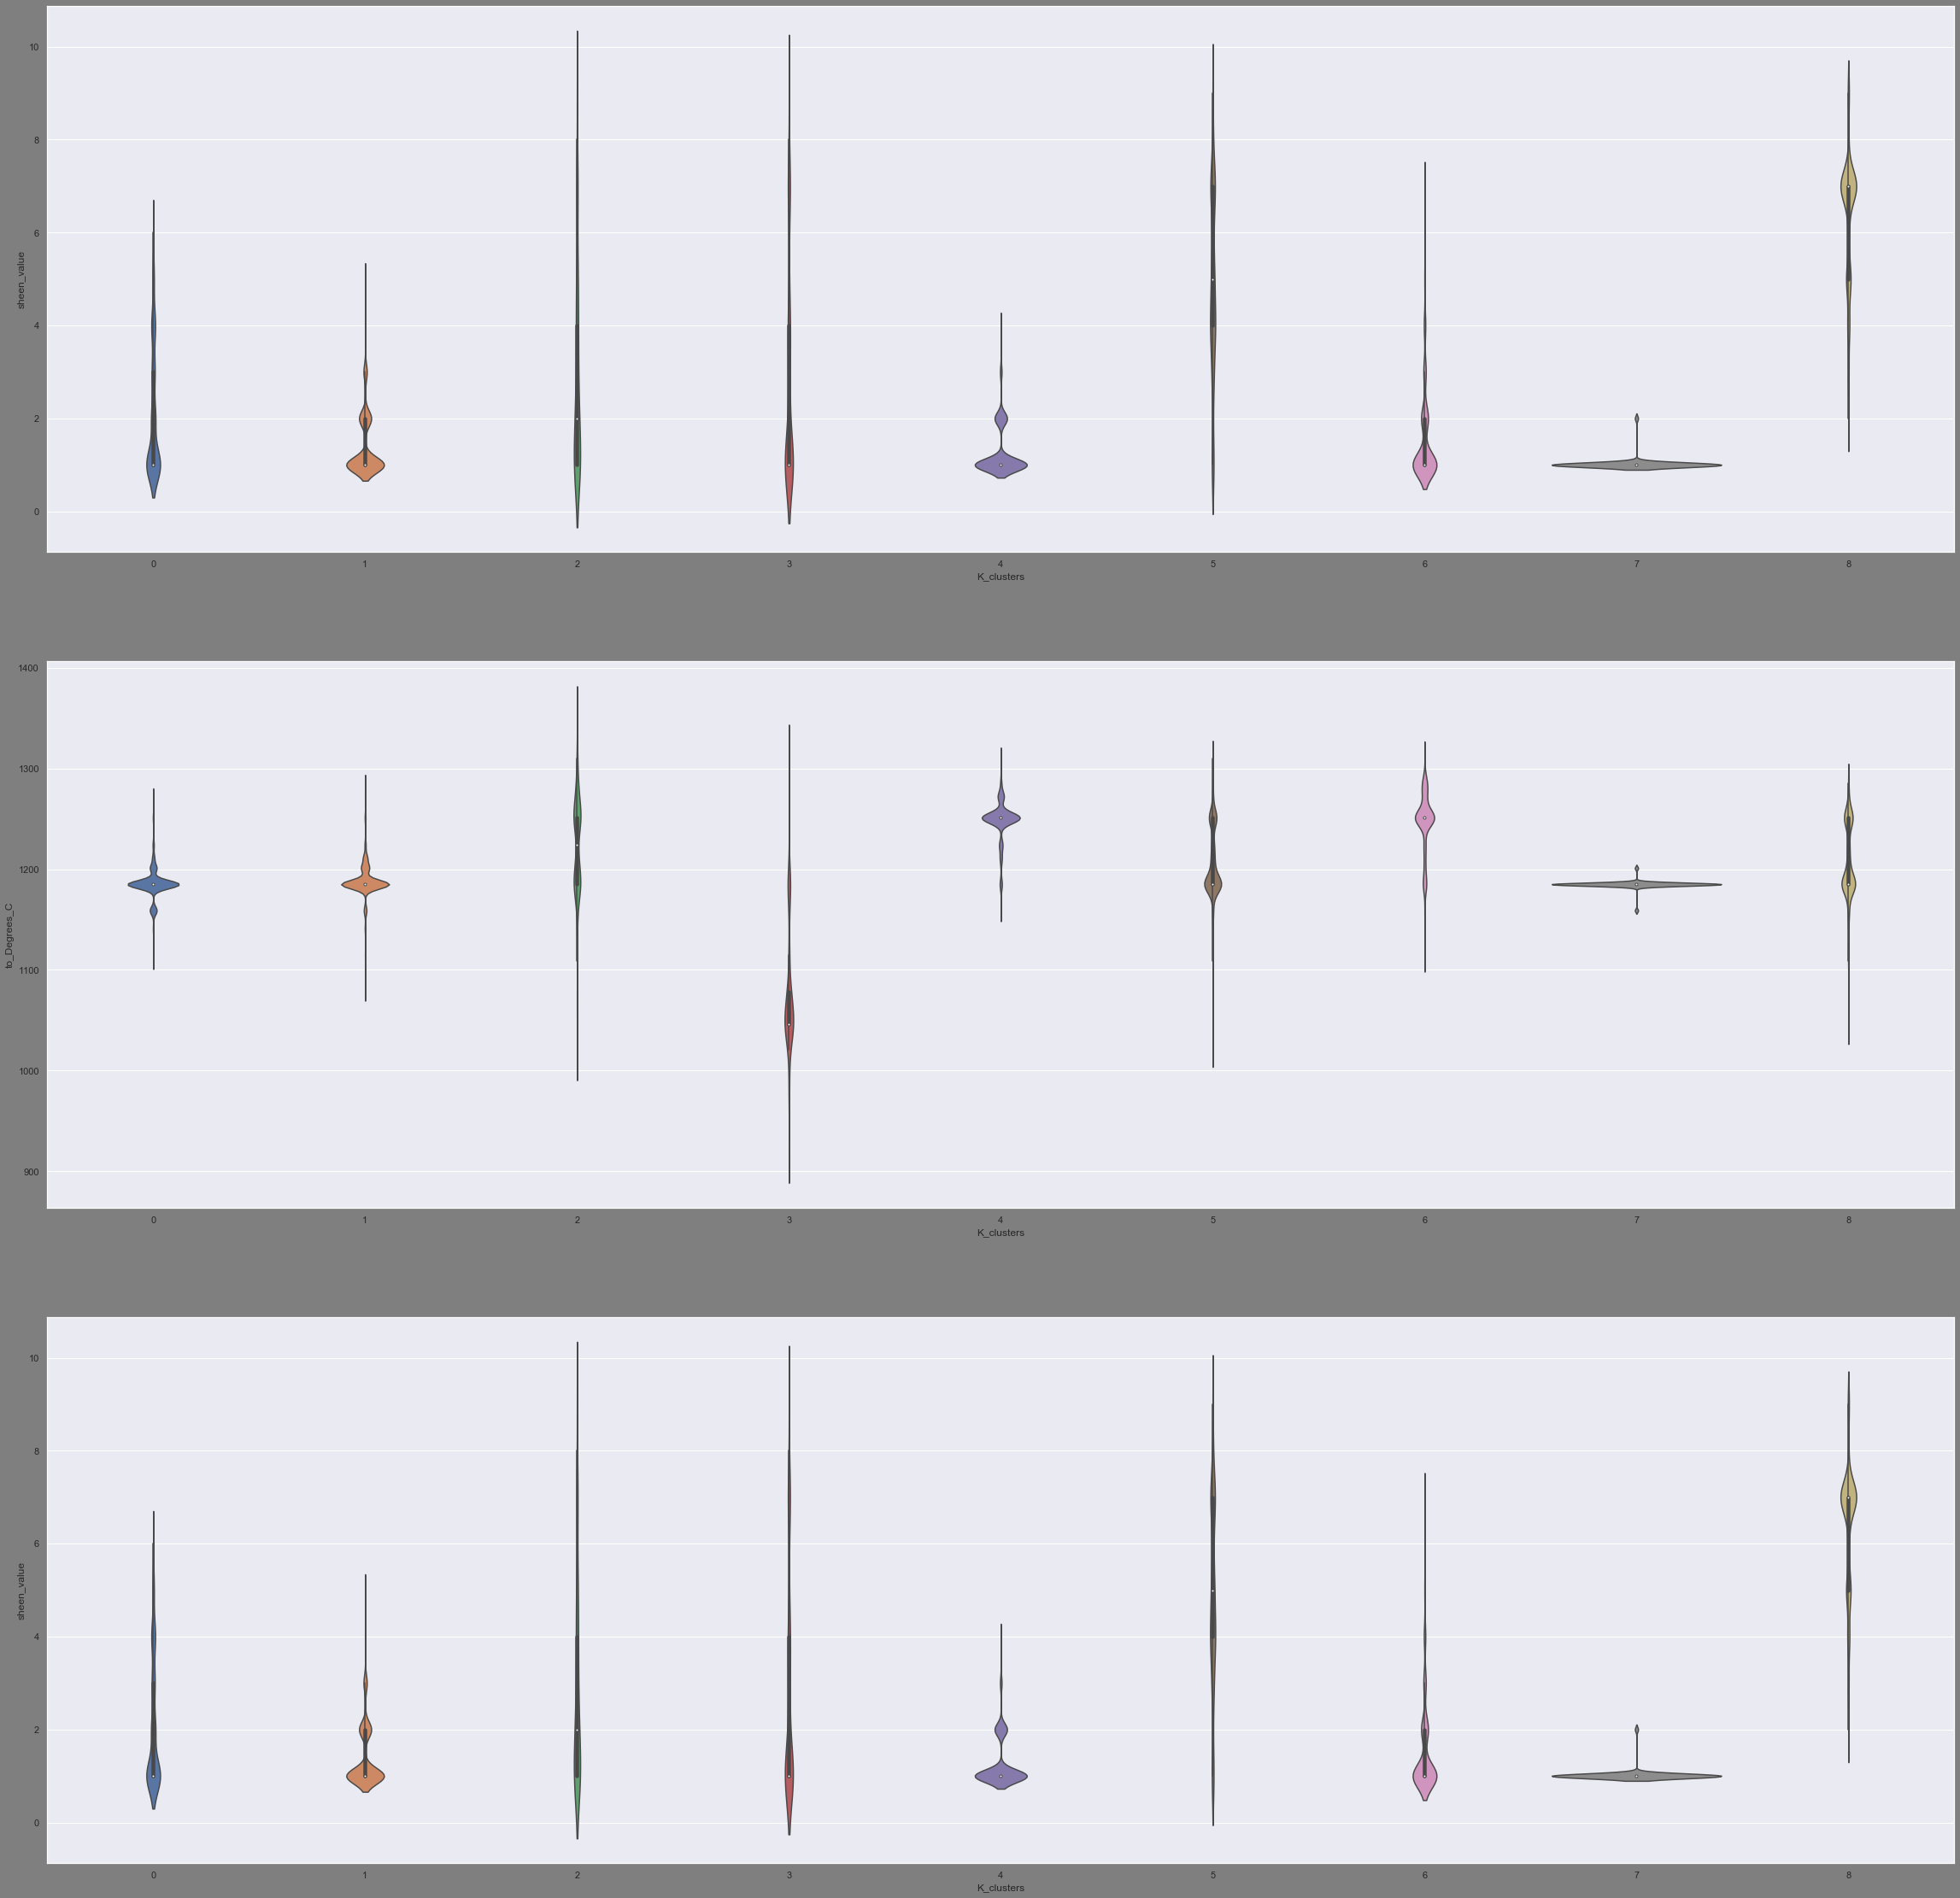

In [2322]:
# explore clusters by temperature and sheen 
plt.figure(figsize=(40,40))
plt.subplot(3,1,1)
sns.violinplot(x="K_clusters", y="sheen_value", data=glaze_df)
plt.subplot(3,1,2)
sns.violinplot(x="K_clusters", y="to_Degrees_C", data=glaze_df)
plt.subplot(3,1,3)
sns.violinplot(x="K_clusters", y="sheen_value", data=glaze_df)

plt.show()

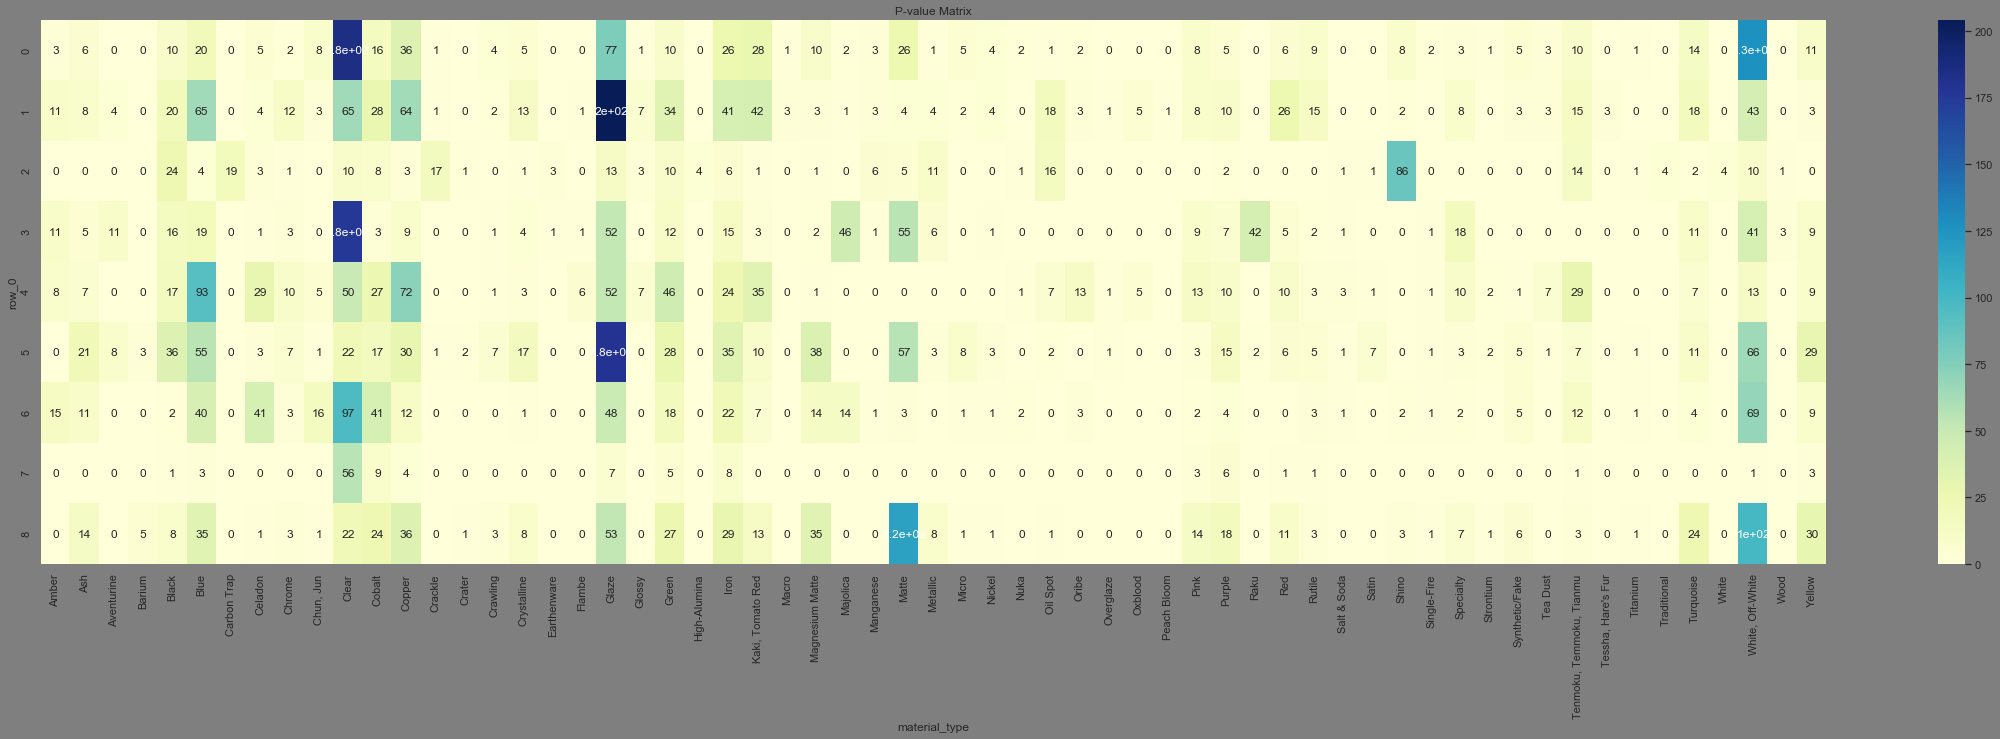

In [2317]:
cross_examin = pd.crosstab(columns = glaze_df.material_type,index =K_clusters)



plt.figure(figsize=(40,10))
sns.set(rc={ 'figure.facecolor':'tab:gray'})
heat_corr = cross_examin
sns.heatmap(heat_corr, annot=True, cmap="YlGnBu") 
plt.title("P-value Matrix") 
plt.show()

plt.show()

In [2344]:
 glaze_df[['name','material_type',
          'surface_type','to_orton_cone',
          'transparency_type','temp_catagory',
          'is_glossy','dbscan_clusters',
          'K_clusters']].loc[K_clusters==2].head(40)


name             material_type   surface_type to_orton_cone transparency_type temp_catagory  is_glossy  dbscan_clusters  K_clusters
7                              Alkaline High Fire 1                     Clear         Glossy            10       Transparent          High          1               -1           2
68                        Black (from Dennis Olson)                     Black         Glossy            10               NaN          High          1                0           2
70                                    Black Barnard                     Black    Matte - Dry            10               NaN          High          0               -1           2
72                                   Black Charcoal                     Black  Satin - Matte            11            Opaque          High          0                0           2
76                                    Black Loretta                     Black  Satin - Matte            10            Opaque          High          0                0           2
86                                    Black Shige's                     Black  Glossy - Semi            10            Opaque          High          0                0           2
145                         Reynold's Gold Metallic                  Metallic          Matte            10            Opaque           Mid          0               -1           2
160                     Tom Coleman Celadon Revised                   Celadon         Glossy            10               NaN          High          1               -1           2
165                    Tom Coleman Ice Blue Celadon                   Celadon         Glossy            10               NaN          High          1               -1           2
178             Tom Coleman Iron Blue-Green Celadon                      Blue         Glossy            11       Transparent          High          1                0           2
265              Val Cushing Cobalt Green (from CM)                     Green  Satin - Matte            10       Semi-opaque          High          0               -1           2
291                                   Crackle Glaze                   Crackle         Glossy             9               NaN          High          1               -1           2
300                             Crystal Shaneresque               Crystalline  Satin - Matte            10            Opaque          High          0               -1           2
341  Val Cushing Green Reitz Matt no GB no petalite                     Green  Satin - Matte            10       Semi-opaque          High          0               -1           2
349                               Grey Blue Celadon                   Celadon         Glossy            10               NaN           Mid          1               -1           2
354                          Hendley's Rhodes Black                     Black  Satin - Matte            10               NaN          High          0               -1           2
360                                    Ice Ice Baby                   Crackle  Glossy - Semi            10       Translucent          High          0                0           2
388                      Matt Shannon's No-Craze Sr                     Matte  Satin - Matte            10            Opaque          High          0               -1           2
404                                        Oil spot  Tenmoku, Temmoku, Tianmu         Glossy            11            Opaque          High          1               -1           2
405                              John's Oil Spot #3                  Oil Spot         Glossy            11            Opaque          High          1                0           2
406                               Bailey's Oil Spot                  Oil Spot         Glossy            11            Opaque          High          1                0           2
410                            Oil spot Traditional  Tenmoku, Temmoku, Tianmu         Glossy            11   

In [2342]:
#'material_type' 'to_orton_cone','temp_catagory'''transparency_type'''
glaze_df['to_orton_cone'].loc[K_clusters==2].value_counts()


10    97
6     88
11    26
8     20
7     15
12    15
5     11
13     9
9      6
03     3
04     2
05     1
02     1
14     1
1      1
4      1
Name: to_orton_cone, dtype: int64

In [2347]:
glaze_df[['rgb_r','rgb_g',
          'rgb_b','is_glossy',
          'SiO2_Al2O3_ratio_umf',
          'R2O_umf','RO_umf',
          'to_Degrees_C',
          'colorant_oxide_sum',
          'opacity_value',
          'K_clusters']].loc[K_clusters==1].describe()

rgb_r       rgb_g       rgb_b   is_glossy  SiO2_Al2O3_ratio_umf     R2O_umf      RO_umf  to_Degrees_C  colorant_oxide_sum  opacity_value  K_clusters
count  455.000000  455.000000  455.000000  838.000000            838.000000  838.000000  838.000000    838.000000          838.000000     615.000000       838.0
mean    94.663736   73.978022   79.224176    0.704057              9.762498    0.276856    0.723144   1188.584726            0.091126       1.764228         1.0
std     93.471185   83.225025   89.733246    0.456738              4.181021    0.106321    0.106321     16.615171            0.153279       0.729568         0.0
min      0.000000    0.000000    0.000000    0.000000              0.000000    0.023200    0.240500   1078.000000            0.000000       1.000000         1.0
25%      0.000000    0.000000    0.000000    0.000000              7.466950    0.205550    0.670625   1185.000000            0.013725       1.000000         1.0
50%     79.000000   41.000000   41.000000    1.000000              8.883050    0.254700    0.745300   1185.000000            0.058350       2.000000         1.0
75%    166.000000  124.000000  140.000000    1.000000             10.585500    0.329375    0.794450   1185.000000            0.120625       2.000000         1.0
max    255.000000  255.000000  255.000000    1.000000             47.882000    0.759500    0.976800   1285.000000            2.329000       3.000000         1.0

# Results 
the variables used in clustering were selected based on their contribution to recipes. the bulk of most glazes are made of sililca and alumina.In addition boron, alkali and alkaline earth oxides are added to enhance melting. Colorant oxides were grouped and summated, along with opacifing oxides. The final firing temperature in degrees C was used as well. All variables were standardized, and a UMAP projection was condicted for visualizations and for use with clustering. The results from clustering suggest two methods for different purposes DBSCAN using the standardized variables and Kmeans using on the UMAP projections.
#### DBSCAN
    DBSCAN formed 4 weak clusters with a silhouette score of 0.22, it was  quite sucessfull at seperating anomolies. The first cluster is populated with typical glazes close to a 0.7 R2O to 0.3 RO flux ratios, and common ratios of silica to alumina. The glazes that clustered in the first group would fall into the relm of durable glazes for functional surfaces such as tile dinner & sanitation ware.
    The second Cluster formed around shino glazes also known as carbon trap glazes a type of japanese glaze that is high in alkali metal flux and alumina. These glazes are commonly used in wood kilns. these glazes can be problematic when applied overtop of other glazes. 
    The third&fourth clusters contained low temperature alkaline glazes also comonly known as water blue glaze when copper is added. These glazes originate from persia and have very little alumina in them, they also fire to a much lower temperature than most feldspathic glazes, these glases comonly have problems with eflorescence and crazing. 
    Glazes that were separated as outliers fell into the relm of effects glazes, these glazes usually fall well outside the chemistry of a typical glaze,and are formulated to create a certain visual effect such as crystals, sparkle, metalic luster,  these  glazes are prone to issues such as metal leaching, crazing, dunting, and shivering, and eflorescence. This makes DBSCAN useful for making sugestions to individuals and companies producing work that has to function and wanted to create a glaze pallette that wouldn't fail their customers. 
#### Kmeans
by using K-means on the UMAP projections 8 clusters  were formed with a silhouette score of 0.41
0. k cluster0 contains mid range glazes that fire to ~1200C, and are either white or clear in color 
1. K-cluster 1 contains mostly glossy glazes and semigloss glazes, with an average silica alumina ration of 8.88:1, that fire to a hot cone 6. glazes show a tendency to be dark colors. the R20 flux UMF is lower than a typical glaze with an average of 0.27

2. glazes tend to be more matte with an average silica to alumina ratio o 5.4. Glazes  fall between a mid and high fire temperature range, and have a typical flux ratio R2O 0.71 to RO 0.29.
3.
4.
5.
6.

useful in its ablity to create several small weak clusters with the UMAP projections. the K-menas clusters were able to seperate glazes by firing range

0.41 8 clusters 

### issues around data that might be resolved though furhther experimentation 
 Sparsity was a large problem with this dataset, glazes often employ different metal oxides for the same purpose, for example a glaze could have a mole to mole substitution of lithium for sodium with little change in color, quality, or physical charicteristics. Many of the Metal oxides used as colorants for glazes are used in small amounts and can vary widely. 
 the distribution of the data was problematic as well, the dataset had many outliers, this is because most glazes for use on functional surfaces devieate very little from a specific formula. This dataset also includes glazes for special effects, these effects glazes often have chemistrys that are on the edge of or well outside of the chemical makeup of most glazes. 
 Overlap was also a problem with many glazes simply changing one ingredient such as a colorant or adding more Alumina can alter the color and or physical qualities of the glaze quite drasticly all while maintaing the same values for the other variables. 

# Conclusions
Ultimatly this Data Set was quite difficult to cluster, nearly all clusters formed had silhouette scores below 0.5.  This was due to several factors, many of the variables had a high level of sparcity, particularly metal oxides, this is due to the fact that glazes often substitute various metal oxides for one another, and certain metal oxides result in atributes to a glaze. Another problem with the dataset were outliers, most glazes don't deviate far from from a silica to alumina ratio of 5:1 and an RO to R2O flux ratio of 7:2, in addition very few glazes have a high amounts of transition metals in them usually only around 2% for added color. However there are several types of glazes that fall well outside of a typical glaze. These glazes are usualy formulated to create a particular visual or physical effect, many of them are not formulated for durability food saftey, or functionality. 


number of outliers in this dataset 

## Further Experimentaion
test results with experiment,

look more specifically at matte glazes and temperature labeling 

try to cluster by color only 



handle sparsity in a different way. 

collect better color data. the color data in the dataframe really only helps differentiate from dark and light. there also isnt any infomration on how the data was collected. Glazes tend to sho a high level of subtle variation in color something that this dataset clearly doesn't capture.  One way to do this would be to take images of tiles found on the web site and sample them for color variation this would likely require a neural network to define the boundries of the tile in the image, along with a way to correct image defects from lighting and camera. 